# Lab 3: Zillow Dataset CRISP-DM Capstone: Clustering
MSDS 7331 Data Mining - Section 403 - Lab 3

Team: Ivelin Angelov, Yao Yao, Kaitlin Kirasich, Albert Asuncion

<a id="top"></a>
## Contents
* <a href="#Imports">Imports of libraries and data files</a>
* <a href="#Business">Business Understanding</a>
* <a href="#Description">Dataset Description</a>
    - <a href="#Description_1">Describtion of meaning and type of data attributes before the cleaning process</a>
    - <a href="#Description_2">Verification and description of data quality</a>
    - <a href="#Description_3">Cleaning process</a>
    - <a href="#Description_4">Final verification of data quality</a>
    - <a href="#Description_5">Describtion of meaning and type of final data attributes after the cleaning process</a>
    - <a href="#Description_6">Table of Binary Variables</a>
    - <a href="#save_state">Save cleaned dataset</a>
* <a href="#restore_state">Load cleaned dataset [Checkpoint]</a>
* <a href="#Attribute">Attribute Visualizion</a>
    - <a href="#Viz1">Count of Bedrooms</a>
    - <a href="#Viz2">Average Tax Per Square Feet</a>
    - <a href="#Viz3">Continuous Variable Correlation Heatmap</a>
    - <a href="#Viz4">Longitude and Latitude Data Points</a>
    - <a href="#Viz5">Number of Stories vs Year Built</a>
* <a href="#Train">Train and Adjust Parameters</a>
    - <a href="#train_kmeans">KMeans Clustering</a>
    - <a href="#train_agglomerative">Agglomerative Clustering</a>
    - <a href="#train_spectral">Spectral Clustering</a>

* <a href="#Evaluate">Evaluate and Compare</a>
* <a href="#Visualize">Visualize Results</a>
* <a href="#Ramifications">Summarize the Ramifications</a>
* <a href="#Deployment">Deployment</a>
* <a href="#Exceptional">Exceptional Work</a>
* <a href="#References">References</a>
________________________________________________________________________________________________________
<a href="#top">⏫ Back to Top</a>

<a id="Imports"></a>
# Imports of libraries and utility functions

We chose to use the same Zillow dataset since Lab 1 for this exploration in clustering.

The function `output_variables_table` shows if the variable is nominal, interval, ratio, or ordinal for further use on clustering and visualization. The function `fix_outliers`is used prior to the visualization and clustering of the variables.

<a href="#top">⏫ Back to Top</a>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import time
from IPython.display import display, HTML
import folium
from folium.plugins import HeatMap

# import warnings
# warnings.filterwarnings('ignore')

variables_description = [
['airconditioningtypeid', 'nominal', 'TBD', 'Type of cooling system present in the home (if any)']
,['architecturalstyletypeid', 'nominal', 'TBD', 'Architectural style of the home (i.e. ranch, colonial, split-level, etc…)']
,['assessmentyear', 'interval', 'TBD', 'The year of the property tax assessment']
,['basementsqft', 'ratio', 'TBD', 'Finished living area below or partially below ground level']
,['bathroomcnt', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathrooms']
,['bedroomcnt', 'ordinal', 'TBD', 'Number of bedrooms in home']
,['buildingclasstypeid', 'nominal', 'TBD', 'The building framing type (steel frame, wood frame, concrete/brick)']
,['buildingqualitytypeid', 'ordinal', 'TBD', 'Overall assessment of condition of the building from best (lowest) to worst (highest)']
,['calculatedbathnbr', 'ordinal', 'TBD', 'Number of bathrooms in home including fractional bathroom']
,['calculatedfinishedsquarefeet', 'ratio', 'TBD', 'Calculated total finished living area of the home']
,['censustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['decktypeid', 'nominal', 'TBD', 'Type of deck (if any) present on parcel']
,['finishedfloor1squarefeet', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet12', 'ratio', 'TBD', 'Finished living area']
,['finishedsquarefeet13', 'ratio', 'TBD', 'Perimeter living area']
,['finishedsquarefeet15', 'ratio', 'TBD', 'Total area']
,['finishedsquarefeet50', 'ratio', 'TBD', 'Size of the finished living area on the first (entry) floor of the home']
,['finishedsquarefeet6', 'ratio', 'TBD', 'Base unfinished and finished area']
,['fips', 'nominal', 'TBD', 'Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details']
,['fireplacecnt', 'ordinal', 'TBD', 'Number of fireplaces in a home (if any)']
,['fireplaceflag', 'ordinal', 'TBD', 'Is a fireplace present in this home']
,['fullbathcnt', 'ordinal', 'TBD', 'Number of full bathrooms (sink, shower + bathtub, and toilet) present in home']
,['garagecarcnt', 'ordinal', 'TBD', 'Total number of garages on the lot including an attached garage']
,['garagetotalsqft', 'ratio', 'TBD', 'Total number of square feet of all garages on lot including an attached garage']
,['hashottuborspa', 'ordinal', 'TBD', 'Does the home have a hot tub or spa']
,['heatingorsystemtypeid', 'nominal', 'TBD', 'Type of home heating system']
,['landtaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the land area of the parcel']
,['latitude', 'interval', 'TBD', 'Latitude of the middle of the parcel multiplied by 10e6']
,['logerror', 'interval', 'TBD', 'Error or the Zillow model response variable']
,['longitude', 'interval', 'TBD', 'Longitude of the middle of the parcel multiplied by 10e6']
,['lotsizesquarefeet', 'ratio', 'TBD', 'Area of the lot in square feet']
,['numberofstories', 'ordinal', 'TBD', 'Number of stories or levels the home has']
,['parcelid', 'nominal', 'TBD', 'Unique identifier for parcels (lots)']
,['poolcnt', 'ordinal', 'TBD', 'Number of pools on the lot (if any)']
,['poolsizesum', 'ratio', 'TBD', 'Total square footage of all pools on property']
,['pooltypeid10', 'nominal', 'TBD', 'Spa or Hot Tub']
,['pooltypeid2', 'nominal', 'TBD', 'Pool with Spa/Hot Tub']
,['pooltypeid7', 'nominal', 'TBD', 'Pool without hot tub']
,['propertycountylandusecode', 'nominal', 'TBD', 'County land use code i.e. it\'s zoning at the county level']
,['propertylandusetypeid', 'nominal', 'TBD', 'Type of land use the property is zoned for']
,['propertyzoningdesc', 'nominal', 'TBD', 'Description of the allowed land uses (zoning) for that property']
,['rawcensustractandblock', 'nominal', 'TBD', 'Census tract and block ID combined - also contains blockgroup assignment by extension']
,['regionidcity', 'nominal', 'TBD', 'City in which the property is located (if any)']
,['regionidcounty', 'nominal', 'TBD', 'County in which the property is located']
,['regionidneighborhood', 'nominal', 'TBD', 'Neighborhood in which the property is located']
,['regionidzip', 'nominal', 'TBD', 'Zip code in which the property is located']
,['roomcnt', 'ordinal', 'TBD', 'Total number of rooms in the principal residence']
,['storytypeid', 'nominal', 'TBD', 'Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.']
,['structuretaxvaluedollarcnt', 'ratio', 'TBD', 'The assessed value of the built structure on the parcel']
,['taxamount', 'ratio', 'TBD', 'The total property tax assessed for that assessment year']
,['taxdelinquencyflag', 'nominal', 'TBD', 'Property taxes for this parcel are past due as of 2015']
,['taxdelinquencyyear', 'interval', 'TBD', 'Year']
,['taxvaluedollarcnt', 'ratio', 'TBD', 'The total tax assessed value of the parcel']
,['threequarterbathnbr', 'ordinal', 'TBD', 'Number of 3/4 bathrooms in house (shower + sink + toilet)']
,['transactiondate', 'nominal', 'TBD', 'Date of the transaction response variable']    
,['typeconstructiontypeid', 'nominal', 'TBD', 'What type of construction material was used to construct the home']
,['unitcnt', 'ordinal', 'TBD', 'Number of units the structure is built into (i.e. 2 = duplex, 3 = triplex, etc...)']
,['yardbuildingsqft17', 'interval', 'TBD', 'Patio in yard']
,['yardbuildingsqft26', 'interval', 'TBD', 'Storage shed/building in yard']
,['yearbuilt', 'interval', 'TBD', 'The Year the principal residence was built']
]
variables = pd.DataFrame(variables_description, columns=['name', 'type', 'scale','description'])
variables = variables.set_index('name')

def output_variables_table(variables, dataset):
    variables = variables.sort_index()
    rows = ['<tr><th>Variable</th><th>Type</th><th>Scale</th><th>Meaning</th></tr>']
    for vname, atts in variables.iterrows():
        if vname not in dataset.columns:
            continue
        atts = atts.to_dict()
        # add scale if TBD
        if atts['scale'] == 'TBD':
            if atts['type'] in ['nominal', 'ordinal']:
                uniques = dataset[vname].unique()
                uniques = list(uniques.astype(str))
                if len(uniques) < 10:
                    atts['scale'] = '[%s]' % ', '.join(uniques)
                else:
                    atts['scale'] = '[%s]' % (', '.join(uniques[:5]) + ', ... (%d More)' % len(uniques))
            if atts['type'] in ['ratio', 'interval']:
                atts['scale'] = '(%d, %d)' % (dataset[vname].min(), dataset[vname].max())
        row = (vname, atts['type'], atts['scale'], atts['description'])
        rows.append('<tr><td>%s</td><td>%s</td><td>%s</td><td>%s</td></tr>' % row)
    return HTML('<table>%s</table>' % ''.join(rows))

def fix_outliers(data, column):
    """
        An utility function used to find and fix outliers
    """
    mean = data[column].mean()
    std = data[column].std()
    max_value = mean + std * 5
    min_value = mean - std * 5
    
    if data[column].max() < max_value and data[column].min() > min_value:
        print('No outliers found')
        return
    
    print('Outliers found!')
    
    f, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=[15, 7])
    
    f.subplots_adjust(hspace=.4)
    
    sns.boxplot(data[column].dropna(), ax=ax0, color="#34495e").set_title('Before')
    sns.distplot(data[column].dropna(), ax=ax2, color="#34495e").set_title('Before')

    data.loc[data[column] > max_value, column] = max_value
    data.loc[data[column] < min_value, column] = min_value
    
    sns.boxplot(data[column].dropna(), ax=ax1, color="#34495e").set_title('After')
    sns.distplot(data[column].dropna(), ax=ax3, color="#34495e").set_title('After')


## Load the dataset file

We used the original Kaggle dataset to clean and visualize. Prior to the clustering procedure, we wrote to file and created a <a href="#restore_state">checkpoint to load the cleaned dataset</a>.

<a href="#top">⏫ Back to Top</a>

In [2]:
datafilename = '../../input/properties_2016.csv'

if not os.path.exists(datafilename):
    raise Exception('Download properties_2016.csv.zip file from https://www.kaggle.com/c/zillow-prize-1/data and extract it into the input foulder')

dataset = pd.read_csv(datafilename, low_memory=False)
variables = variables.loc[dataset.columns]
'The dataset has %d rows and %d columns' % dataset.shape

'The dataset has 2985217 rows and 58 columns'

<a id="Business"></a>
# Business Understanding
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?
</i>

<a href="#top">⏫ Back to Top</a>

Our dataset consists of real estate properties in the southern California area (Los Angeles, Orange, and Ventura counties) which was provided as a Kaggle competition dataset from Zillow. Zillow is the leading provider of real estate consumer data and mobile real estate apps. Consisting of over 90,000 records, the dataset has 57 property features for predicting sales price.

Over the course of the term, we’ve used the dataset to fulfill course requirements. For this clustering exercise, we developed three models:

1.	MiniBatchKMeans – K-means is an iterative algorithm which assigns data points to the nearest centroid and updates the centroids each pass until convergence or predetermined number of iterations is met.  Mini-batch k-means is a variant of the k-means algorithm which uses a smaller subset of the data with the idea that it will converge faster thus reducing the computation time.  In comparison to other ways to reduce convergence, mini-batch produces results that are typically only slightly worse than k-means.  In practice we get as expected, mini-batch runs faster but produces slightly worse results.
2.	Spectral - Spectral clustering uses the eigenvalues of the similarity matrix to reduce dimensions before clustering.  In practice, this is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster. For instance, when clusters are nested circles on the 2D plan.  Since we are working with geo data, our dataset should be a good candidate for this type of clustering.
3.	Agglomerative - Agglomerative clustering is a hierarchical algorithm which uses a bottom up approach where each observation starts in its own cluster while pairs of clusters are merged as they move up the hierarchy.  This algorithm recursively merges the pair of clusters that minimally increases a given linkage distance.  Because the linkage criteria determine the metric used for the merge strategy, we will be playing around with all 3 criteria: ward, maximum, and average for analysis.

To evaluate effectiveness of the clustering algorithms, we selected from 2 classes of similarity or distance metrics. The first consists of Euclidean measures namely Euclidean/L2-Norm, Manhattan, and Maximum distances. Second, Non-Euclidean distances comprising of Cosine, Jaccard, and Edit distances. Euclidean distances are appropriate for data that can be represented in Euclidean space or on a coordinate system (2 or 3 dimensional). Non-Euclidean measures, on the other hand, involve data that will not fit in Euclidean space. Regardless of which class of distance measure is used, values are high for dissimilar data and low for similar data. We want a metric which maximizes the distance between samples in different clusters, and minimizes distance within each cluster. 

Our clustering models utilized the geocode (i.e. latitude and longitude) and property tax amounts for each parcel ID from our clean dataset. Our goal was to derive insight into tax amount as indicator of assessed property value as it relates to actual parcel location. The advantage of this method is to show clustering based upon tax amount instead of by pre-determined geographical lines such as zip code or neighborhood. This analysis may be useful to a hypothetical insurance company, for example, allowing for the understanding of the market for purposes of marketing or setting up of field offices catered to specific market segments. The incorporation of centroids in the visualizations provides specific areas in the map central to each of the clusters.

Alternatively, we cite applications of this analysis in public policy which we discussed further in the Deployment section.

<a id="Description"></a>
# Dataset Description
<b>10 points</b>

<i>
<b>Description:</b><br/>
Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Description_1"></a>
## Meaning and type of data for each attribute in the data file before data cleaning

The function `output_variables_table` shows if the variable is nominal, interval, ratio, or ordinal. The function `fix_outliers` is then applied on the variables in order to get rid of outliers and visualize the data.
<br/>
<a href="#top">⏫ Back to Top</a>

In [3]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[nan, 1.0, 13.0, 5.0, 11.0, 9.0, 12.0, 3.0]",Type of cooling system present in the home (if any)
architecturalstyletypeid,nominal,"[nan, 7.0, 21.0, 8.0, 2.0, 3.0, 5.0, 10.0, 27.0]","Architectural style of the home (i.e. ranch, colonial, split-level, etc…)"
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
basementsqft,ratio,"(20, 8516)",Finished living area below or partially below ground level
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (38 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0.0, 4.0, 5.0, 2.0, 3.0, ... (22 More)]",Number of bedrooms in home
buildingclasstypeid,nominal,"[nan, 3.0, 4.0, 5.0, 2.0, 1.0]","The building framing type (steel frame, wood frame, concrete/brick)"
buildingqualitytypeid,ordinal,"[nan, 7.0, 4.0, 10.0, 1.0, ... (13 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[nan, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(1, 952576)",Calculated total finished living area of the home


<a id="Description_2"></a>
## Verification and description of data quality

<a href="#top">

⏫ Back to Top</a>

### Examining Distribution of Missing Values
From the observations, most of the rows have about 30 missing values. For the observations that have 57 missing values, it means that most of the features are missing and we choose to remove those. We will add in values to those missing where appropriate, below.

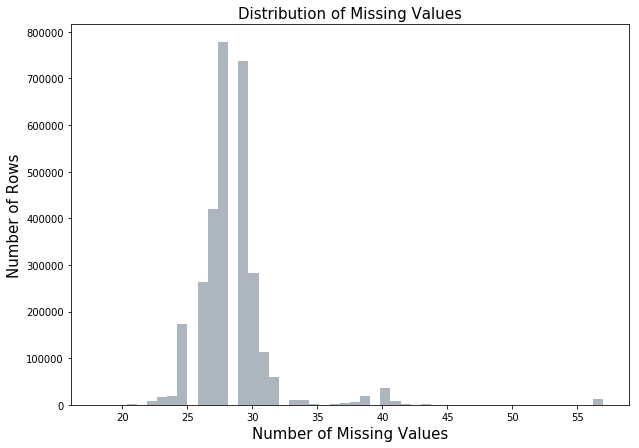

In [4]:
plt.rcParams['figure.figsize'] = [10, 7]

number_missing_per_row = dataset.isnull().sum(axis=1)
sns.distplot(number_missing_per_row, color="#34495e", kde=False);
plt.title('Distribution of Missing Values', fontsize=15)
plt.xlabel('Number of Missing Values', fontsize=15)
plt.ylabel('Number of Rows', fontsize=15);

### All observations have a value for parcelid

In [5]:
dataset['parcelid'].isnull().sum()

0

### 0.1 percent of the data has only parcelid present and all other variables missing
We choose to remove those observations because they don't present any value

In [6]:
print(round(len(number_missing_per_row[number_missing_per_row >= 57]) / len(dataset) * 100, 2),
      'percent of the data has no data features outside of parcelid and will be removed')
dataset = dataset[number_missing_per_row < 57]
print('The dataset now has %d rows' % len(dataset))

0.38 percent of the data has no data features outside of parcelid and will be removed
The dataset now has 2973780 rows


### Table of Missing Values

Of the available variables, here is a table that describes the number of missing values as well as the percent missing.

In [7]:
missing_values = dataset.isnull().sum().reset_index()
missing_values.columns = ['Variable Name', 'Number Missing Values']
missing_values['Percent Missing'] = missing_values['Number Missing Values'] / len(dataset) * 100
missing_values['Percent Missing'] = missing_values['Percent Missing'].replace(np.inf, 0)
missing_values.set_index('Variable Name')

,Number Missing Values,Percent Missing
Variable Name,,
parcelid,0,0.000000
airconditioningtypeid,2162261,72.710860
architecturalstyletypeid,2967719,99.796185
basementsqft,2972152,99.945255
bathroomcnt,25,0.000841
bedroomcnt,13,0.000437
buildingclasstypeid,2961151,99.575322
buildingqualitytypeid,1035292,34.814008
calculatedbathnbr,117475,3.950359


<a id="Description_3"></a>
## Cleaning process

For variables that are nominal, ratio, and interval where appropriate, we wrote a function that replaces outliers 5 standard deviations from the mean and assigning them as 5 standard deviations above or below the mean, respectively.

<a href="#top">⏫ Back to Top</a>

### Variable: airconditioningtypeid - Type of cooling system present in the home (if any)
Has datatype: nominal and 72.710860 percent of values missing 

For this variable, missing values indicate the absence of a cooling system.  We replace all missing values with 0 to represent no cooling system. We changed the column datatype to integer.

In [8]:
print('Before', dataset['airconditioningtypeid'].unique())
dataset['airconditioningtypeid'] = dataset['airconditioningtypeid'].fillna(0).astype(np.int32)
print('After', dataset['airconditioningtypeid'].unique())

Before [ nan   1.  13.   5.  11.   9.  12.   3.]
After [ 0  1 13  5 11  9 12  3]


### Variable: architecturalstyletypeid - Architectural style of the home (i.e. ranch, colonial, split-level, etc…)
Has datatype: nominal and 99.796185 percent of values missing 

Architectural style describes the home design. As such, it is not something we can extrapolate a value for. With over 99% of values missing, we decided to eliminate this variable.

In [9]:
del dataset['architecturalstyletypeid']

### Variable: assessmentyear - year of the property tax assessment

Has datatype: interval and has 2 values missing

We replaced the missing values with the latest tax year which also happens to be the median tax year. We changed the column datatype to integer.

In [10]:
print('Before', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])
median_value = dataset['assessmentyear'].median()
dataset['assessmentyear'] = dataset['assessmentyear'].fillna(median_value).astype(np.int32)
print('After', dataset['assessmentyear'].unique()[:8].tolist() + ['...'])

Before [2015.0, 2014.0, 2003.0, 2012.0, 2001.0, 2011.0, 2013.0, 2016.0, '...']
After [2015, 2014, 2003, 2012, 2001, 2011, 2013, 2016, '...']


### Variable: basementsqft - Finished living area below or partially below ground level
Has datatype: ratio and 99.945255 percent of values missing

Basements are not standard home features. Whenever a basement is not a feature of the home, the value for area was entered as a missing value. With over 99% of values missing, we decided to eliminate this variable.

In [11]:
del dataset['basementsqft'] 

### Variable: bathroomcnt - Number of bathrooms in home including fractional bathrooms
Has datatype: ordinal and 0.000841 percent of values missing

We decided it is potentially possible for the property to not have a bathroom so we decided to replace missing values with zeros since there are only very few. We changed the column datatype to a float.

In [12]:
print('Before', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bathroomcnt'] = dataset['bathroomcnt'].fillna(0).astype(np.float32)
print('After', dataset['bathroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: bedroomcnt - Number of bedrooms in home
Has datatype: ordinal and 0.000437 percent of values missing

We decided to replace missing values with zeros since there are only very few to represent a studio apartment. We changed the column datatype to integer.

In [13]:
print('Before', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])
dataset['bedroomcnt'] = dataset['bedroomcnt'].fillna(0).astype(np.int32)
print('After', dataset['bedroomcnt'].unique()[:8].tolist() + ['...'])

Before [0.0, 4.0, 5.0, 2.0, 3.0, 1.0, 6.0, 7.0, '...']
After [0, 4, 5, 2, 3, 1, 6, 7, '...']


### Variable: buildingclasstypeid - The building framing type (steel frame, wood frame, concrete/brick)
Has datatype: nominal and 99.576949 percent of values missing

With this much missing values and the difficulty of assigning a building framing type, we decided to remove this variable.

In [14]:
del dataset['buildingclasstypeid']

### Variable: buildingqualitytypeid - Overall assessment of condition of the building from best (lowest) to worst (highest)
Has datatype: ordinal and 34.81 percent of values missing

We chose to replace the missing values with the median of the condition assessment instead of giving the missing values the best or worst value. We changed the column datatype to integer.

In [15]:
print('Before', dataset['buildingqualitytypeid'].unique())
medianQuality = dataset['buildingqualitytypeid'].median()
dataset['buildingqualitytypeid'] = dataset['buildingqualitytypeid'].fillna(medianQuality).astype(np.int32)
print('After', dataset['buildingqualitytypeid'].unique())

Before [ nan   7.   4.  10.   1.  12.   8.   3.   6.   9.   5.  11.   2.]
After [ 7  4 10  1 12  8  3  6  9  5 11  2]


### Variable: calculatedbathnbr - Number of bathrooms in home including fractional bathroom
Has datatype: ordinal and 3.95 percent of values missing

With a low number of missing values, we decided to assign 0 to all missing values since we decided above it is possible that a property could have 0 bathrooms. We changed the column datatype to a float.

In [16]:
print('Before', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])
dataset['calculatedbathnbr'] = dataset['calculatedbathnbr'].fillna(0).astype(np.float32)
print('After', dataset['calculatedbathnbr'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 2.5, 3.5, 5.0, '...']


### Variable: calculatedfinishedsquarefeet - Calculated total finished living area of the home
Has datatype: ratio and 1.48 percent of values missing

These missing values appear to be consistent with 0 or missing values for variables associated with a building or structure on the property such as bathroomcnt, bedroomcnt, or architecturalstyletypeid. We can assume that no structures exist on these properties and we decided to impute zeros to these. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 10926.064470192776, 5068.0, 1776.0, 2400.0, 3611.0, 3754.0, 2470.0, '...']
After [0, 10926, 5068, 1776, 2400, 3611, 3754, 2470, '...']


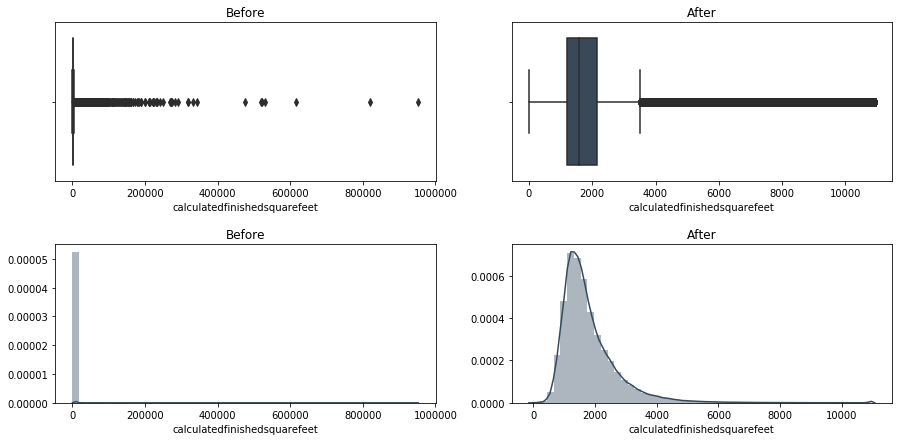

In [17]:
fix_outliers(dataset, 'calculatedfinishedsquarefeet')

print('Before', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])
dataset['calculatedfinishedsquarefeet'] = dataset['calculatedfinishedsquarefeet'].fillna(0).astype(np.int32)
print('After', dataset['calculatedfinishedsquarefeet'].unique()[:8].tolist() + ['...'])

### Variable: censustractandblock - census tract and census block ID

Has datatype: nominal and 2.14 percent of values missing

With such a small amount of missing values, we decided to replace them with the median.  A better approach in the future could be taking into account zip code and then median for the missing values.  We changed the column datatype to a float.

In [18]:
print('Before', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])
median_value = dataset['censustractandblock'].median()
dataset['censustractandblock'] = dataset['censustractandblock'].fillna(median_value)
dataset['censustractandblock'] = dataset['censustractandblock'].astype(np.float32)
print('After', dataset['censustractandblock'].unique()[:5].tolist() + ['...'])

Before [nan, 61110010011023.0, 61110009032019.0, 61110010024015.0, 61110010023002.0, '...']
After [60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, '...']


### Variable: decktypeid - Type of deck (if any) present on parcel
Has datatype: nominal and 99.427311 percent of values missing

Missing values is most likely an indication of an absence of this feature in the property. With 99% missing values, we will remove this column.

In [19]:
del dataset['decktypeid']

### Variable: finishedfloor1squarefeet - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

Having this much missing values and the availability of an alternate variable - calculatedfinishedsquarefeet - with very few missing values, we decided to eliminate this variable.

In [20]:
del dataset['finishedfloor1squarefeet']

### Variable: finishedsquarefeet12 - Finished living area
Has datatype: ratio and 8.89 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Missing values are therefore zeros. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [   nan  4000.  3633. ...,   317.   268.   161.]
After [   0 4000 3633 ...,  317  268  161]


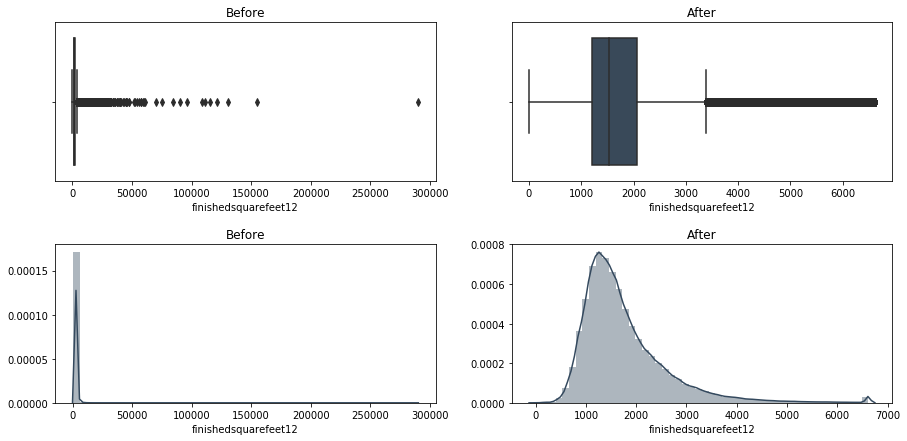

In [21]:
fix_outliers(dataset, 'finishedsquarefeet12')

print('Before', dataset['finishedsquarefeet12'].unique())
dataset['finishedsquarefeet12'] = dataset['finishedsquarefeet12'].fillna(0).astype(np.int32)
print('After', dataset['finishedsquarefeet12'].unique())

### Variable: finishedsquarefeet13 - Finished living area
Has datatype: ratio and 99.743000 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 99% missing values we will remove this from the dataset.

In [22]:
del dataset['finishedsquarefeet13']

### Variable: finishedsquarefeet15 - Total area
Has datatype: ratio and 93.58 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will remove this from the dataset.

In [23]:
del dataset['finishedsquarefeet15']

### Variable: finishedsquarefeet50 - Size of the finished living area on the first (entry) floor of the home
Has datatype: ratio and 93.18 percent of values missing

The finishedsquarefeet fields add up to the calculatedfinishedsquarefeet. Since there are 93% missing values we will replace the missing values with 0. We changed the column datatype to float.

In [24]:
dataset['finishedsquarefeet50'] = dataset['finishedsquarefeet50'].fillna(0).astype(np.float32)

### Variable: finishedsquarefeet6 - Base unfinished and finished area
Has datatype: ratio and 99.26 percent of values missing

With 99% missing values, we decided to delete this variable.

In [25]:
del dataset['finishedsquarefeet6']

### Variable: fips - Federal Information Processing Standard code - see https://en.wikipedia.org/wiki/FIPS_county_code for more details
Has datatype: nominal with values [6037.0, 6059.0, 6111.0] and no missing values

We changed the column datatype to integer.

In [26]:
dataset['fips'] = dataset['fips'].astype(np.int32)

### Variable: fireplacecnt - Number of fireplaces in a home (if any)
Has datatype: ordinal and 89.486882 percent of values missing 

In this dataset, missing value represents 0 fireplaces. We replaced all missing values with zero and change the column datatype to integer. We changed the column datatype to integer.

In [27]:
print('Before', dataset['fireplacecnt'].unique())
dataset['fireplacecnt'] = dataset['fireplacecnt'].fillna(0).astype(np.int32)
print('After', dataset['fireplacecnt'].unique())

Before [ nan   3.   1.   2.   4.   9.   5.   7.   6.   8.]
After [0 3 1 2 4 9 5 7 6 8]


### Variable: fireplaceflag - does the home have a fireplace

Has datatype: ordinal and 99.82 percent of values missing

With 99% missing values, we decided to delete the variable.

In [28]:
del dataset['fireplaceflag']

### Variable: fullbathcnt - Number of full bathrooms (sink, shower + bathtub, and toilet) present in home
Has datatype: ordinal and 3.95 percent of values missing 

We first replaced its missing values with the values of bathroomcnt which is a similar measure. After that, we have 25 observations missing and we replace them with 0. We changed the column datatype to a float.

In [29]:
print('Before', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])
missing_fullbathcnt = dataset['fullbathcnt'].isnull()
dataset.loc[missing_fullbathcnt, 'fullbathcnt'] = dataset['bathroomcnt'][missing_fullbathcnt].fillna(0)
dataset['fullbathcnt'] = dataset['fullbathcnt'].astype(np.float32)
print('After', dataset['fullbathcnt'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']
After [0.0, 2.0, 4.0, 3.0, 1.0, 5.0, 7.0, 6.0, '...']


### Variable: garagecarcnt - Total number of garages on the lot including an attached garage

Has datatype: ordinal and 70.298173 percent of values missing 

We assume that missing values will represent no garage and replace all missing values with zero. We changed the column datatype to integer.

In [30]:
dataset['garagecarcnt'] = dataset['garagecarcnt'].fillna(0).astype(np.int32)
print(dataset['garagecarcnt'].unique())

[ 0  2  4  1  3  5  7  6  8  9 12 11 10 13 14 15 25 21 18 17 24 19 16 20]


### Variable: garagetotalsqft - Total number of garages on the lot including an attached garage

Has datatype: ratio and 70.298173 percent of values missing 

We first replaced missing values where garagecarcnt is 0 with 0 garagetotalsqft. We changed the column datatype to a float.
We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


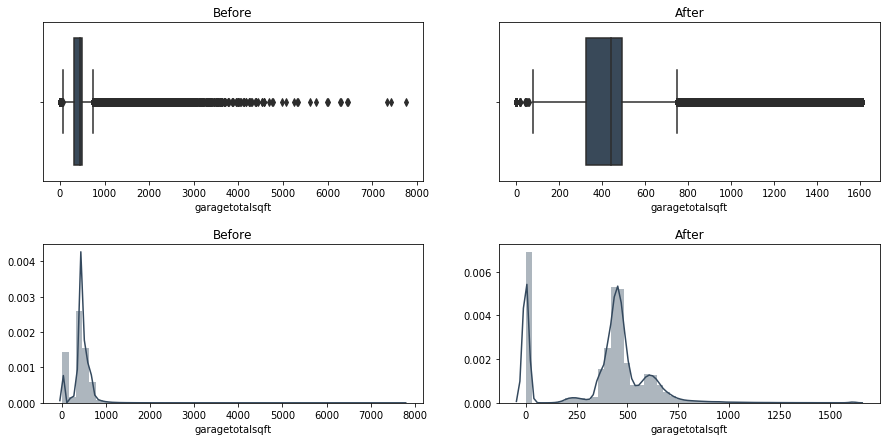

In [31]:
fix_outliers(dataset, 'garagetotalsqft')

dataset.loc[dataset['garagecarcnt'] == 0, 'garagetotalsqft'] = 0
dataset['garagecarcnt'] = dataset['garagecarcnt'].astype(np.float32)
assert dataset['garagetotalsqft'].isnull().sum() == 0

### Variable: hashottuborspa - Does the home have a hot tub or spa

Has datatype: ordinal and 97.679250 percent of values missing 

In this dataset missing values represent doesn't have a hot tub or spa. we replaced all missing values with 0 and all True values with 1. We changed the column datatype to integer.

In [32]:
print('Before', dataset['hashottuborspa'].unique())
dataset['hashottuborspa'] = dataset['hashottuborspa'].fillna(0).replace('True', 1).astype(np.int32)
print('After', dataset['hashottuborspa'].unique())

Before [nan True]
After [0 1]


### Variable: heatingorsystemtypeid - Type of home heating system

Has datatype: nominal and 39.255728 percent of values missing 

We replaced all missing values with 0 which will represent a missing heating system type id. We changed the column datatype to integer.

In [33]:
print('Before', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])
dataset['heatingorsystemtypeid'] = dataset['heatingorsystemtypeid'].fillna(0).astype(np.int32)
print('After', dataset['heatingorsystemtypeid'].unique()[:8].tolist() + ['...'])

Before [nan, 2.0, 7.0, 20.0, 6.0, 13.0, 18.0, 24.0, '...']
After [0, 2, 7, 20, 6, 13, 18, 24, '...']


### Variable: landtaxvaluedollarcnt - the assessed value of the land

Has datatype: ratio and 1.89 percent of values missing

We replaced all missing values with the median assessed land values. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


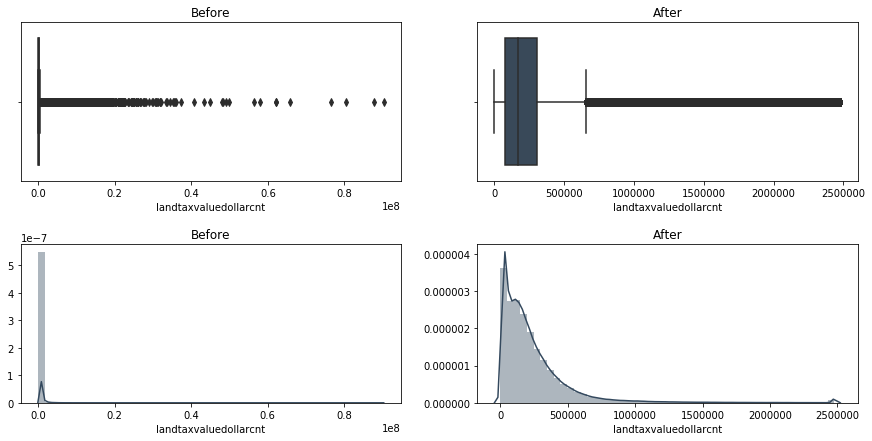

In [34]:
fix_outliers(dataset, 'landtaxvaluedollarcnt')
median_value = dataset['landtaxvaluedollarcnt'].median()
dataset['landtaxvaluedollarcnt'] = dataset['landtaxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variables: latitude and longitude

Has datatype: interval and no missing values. We changed the column datatype to float.

In [35]:
dataset[['latitude', 'longitude']] = dataset[['latitude', 'longitude']].astype(np.float32)

### Variable: lotsizesquarefeet - Area of the lot in square feet

Has datatype: ratio and 8.9 percent of values missing 

We replace all missing values with 0 which will represent no lot.
We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


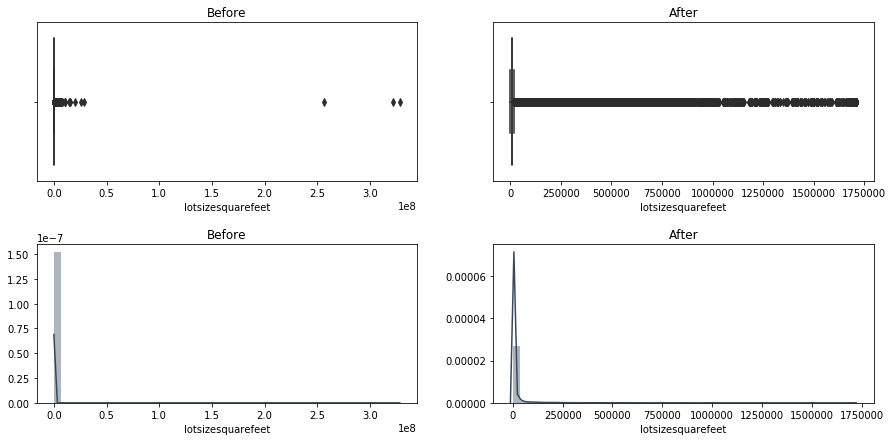

In [36]:
fix_outliers(dataset, 'lotsizesquarefeet')
dataset['lotsizesquarefeet'] = dataset['lotsizesquarefeet'].fillna(0).astype(np.float32)

### Variable: numberofstories - number of stories or levels the home has

Has datatype: ordinal and 77.06 percent of values missing

We replace all missing values with 1 after removing all outliers to represent a single story home. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 1.0, 4.0, 2.0, 3.0, 4.096842535392357, '...']
After [1, 4, 2, 3, '...']


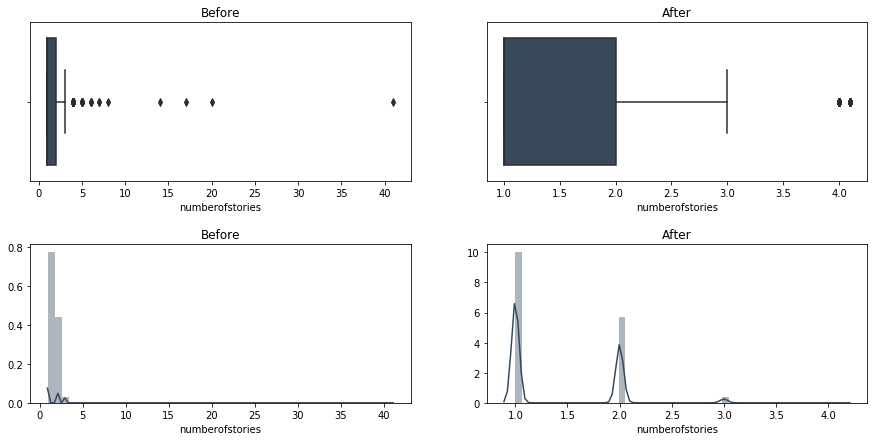

In [37]:
fix_outliers(dataset, 'numberofstories')

print('Before', dataset['numberofstories'].unique()[:8].tolist() + ['...'])
dataset['numberofstories'] = dataset['numberofstories'].fillna(1).astype(np.int32)
print('After', dataset['numberofstories'].unique()[:8].tolist() + ['...'])

### Variable: parcelid - Unique identifier for parcels (lots)
Has datatype: nominal and no values missing. We changed the column datatype to integer.

In [38]:
dataset['parcelid'] = dataset['parcelid'].astype(np.int32)

### Variable: poolcnt - Number of pools on the lot (if any)

Has datatype: ordinal and 82.6 percent of values missing 

We replaced all missing values with 0 which will represent no pools. We changed the column datatype to integer.

In [39]:
print('Before', dataset['poolcnt'].unique())
dataset['poolcnt'] = dataset['poolcnt'].fillna(0).astype(np.int32)
print('After', dataset['poolcnt'].unique())

Before [ nan   1.]
After [0 1]


### Variable: poolsizesum - Total square footage of all pools on property

Has datatype: ratio and 99 percent of values missing 

We replaced all missing values with 0 if number of pools is 0 or with the average poolsizesum otherwise. We changed the column datatype to a float. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


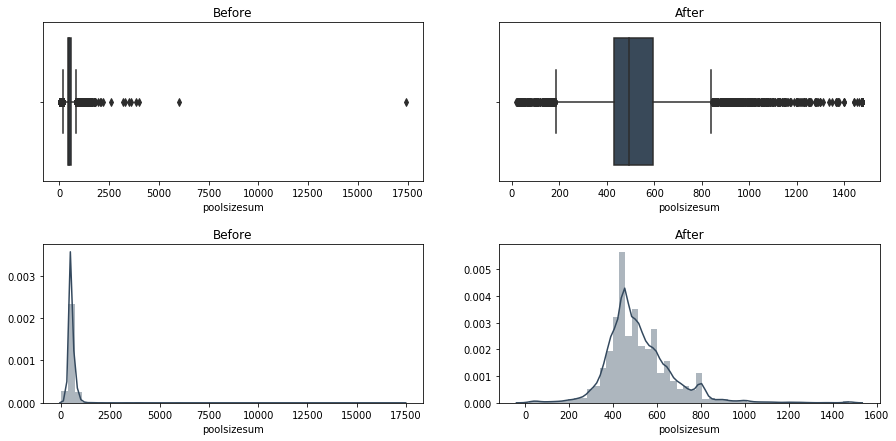

In [40]:
fix_outliers(dataset, 'poolsizesum')
dataset.loc[dataset['poolsizesum'].isnull(), 'poolsizesum'] = int(dataset['poolsizesum'].mean())
dataset.loc[dataset['poolcnt'] == 0, 'poolsizesum'] = 0
dataset['poolcnt'] = dataset['poolcnt'].astype(np.float32)

### Variable: pooltypeid10 - Spa or Hot Tub

Has datatype: nominal and 98.8 percent of values missing 

We replaced all missing values with 0 which will represent no Spa or Hot Tub. We changed the column datatype to integer.

In [41]:
print('Before', dataset['pooltypeid10'].unique())
dataset['pooltypeid10'] = dataset['pooltypeid10'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid10'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid2 - Pool with Spa/Hot Tub

Has datatype: nominal and 98.9 percent of values missing 

We replaced all missing values with 0 which will represent no Pool with Spa/Hot Tub. We changed the column datatype to integer.

In [42]:
print('Before', dataset['pooltypeid2'].unique())
dataset['pooltypeid2'] = dataset['pooltypeid2'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid2'].unique())

Before [ nan   1.]
After [0 1]


### Variable: pooltypeid7 - Pool without hot tub

Has datatype: nominal and 83.6 percent of values missing 

We replaced all missing values with 0 which will represent no pool without hot tub. We changed the column datatype to integer.

In [43]:
print('Before', dataset['pooltypeid7'].unique())
dataset['pooltypeid7'] = dataset['pooltypeid7'].fillna(0).astype(np.int32)
print('After', dataset['pooltypeid7'].unique())

Before [ nan   1.]
After [0 1]


### Variable: propertycountylandusecode - County land use code i.e. it's zoning at the county level

Has datatype: nominal and 0.02 percent of values missing 

We replaced all missing values with 0 which will represent no county land use code. We changed the column datatype to string.

In [44]:
print('Before', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])
dataset['propertycountylandusecode'] = dataset['propertycountylandusecode'].fillna(0).astype(np.str)
print('After', dataset['propertycountylandusecode'].unique()[:8].tolist() + ['...'])

Before ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']
After ['010D', '0109', '1200', '1210', '010V', '300V', '0100', '0200', '...']


### Variable: propertylandusetypeid - Type of land use the property is zoned for

Has datatype: nominal and 0 percent of values missing.

We are just changing the datatype to integer

In [45]:
dataset['propertylandusetypeid'] = dataset['propertylandusetypeid'].astype(np.int32)

### Variable: propertyzoningdesc - Description of the allowed land uses (zoning) for that property

Has datatype: nominal and 33.4 percent of values missing 

We replaced all missing values with 0 which will represent no description of the allowed land uses.  We changed the column datatype to string.

In [46]:
print('Before', dataset['propertyzoningdesc'].unique())
dataset['propertyzoningdesc'] = dataset['propertyzoningdesc'].fillna(0).astype(np.str)
print('After', dataset['propertyzoningdesc'].unique())

Before [nan 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']
After ['0' 'LCA11*' 'LAC2' ..., 'WCR1400000' 'EMPYYY' 'RMM2*']


### Variable: rawcensustractandblock - Census tract and block ID combined - also contains blockgroup assignment by extension

Has datatype: nominal and 0 percent of values missing

We are just changing the datatype to integer

In [47]:
print('Before', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])
dataset['rawcensustractandblock'] = dataset['rawcensustractandblock'].fillna(0).astype(np.int32)
print('After', dataset['rawcensustractandblock'].unique()[:5].tolist() + ['...'])

Before [60378002.041, 60378001.011002004, 60377030.012017004, 60371412.023001, 60371232.052003, '...']
After [60378002, 60378001, 60377030, 60371412, 60371232, '...']


### Variable: regionidcity - City in which the property is located (if any)

Has datatype: nominal and 1.72 percent of values missing

we will replace any missing values with 0 to represent no city ID. We are just changing the datatype to integer

In [48]:
print('Before', dataset['regionidcity'].unique()[:8].tolist() + ['...'])
dataset['regionidcity'] = dataset['regionidcity'].fillna(0).astype(np.int32)
print('After', dataset['regionidcity'].unique()[:8].tolist() + ['...'])

Before [37688.0, 51617.0, 12447.0, 396054.0, 47547.0, nan, 54311.0, 40227.0, '...']
After [37688, 51617, 12447, 396054, 47547, 0, 54311, 40227, '...']


### Variable: regionidcounty - County in which the property is located

Has datatype: nominal and 0 percent of values missing. We changed the column datatype to integer.

In [49]:
print('Before', dataset['regionidcounty'].unique())
dataset['regionidcounty'] = dataset['regionidcounty'].astype(np.int32)
print('After', dataset['regionidcounty'].unique())

Before [ 3101.  1286.  2061.]
After [3101 1286 2061]


### Variable: regionidneighborhood - Neighborhood in which the property is located

Has datatype: nominal and 61.1 percent of values missing 

We replaced all missing values with 0 which will represent no region ID neighborhood. We changed the column datatype to integer.

In [50]:
print('Before', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])
dataset['regionidneighborhood'] = dataset['regionidneighborhood'].fillna(0).astype(np.int32)
print('After', dataset['regionidneighborhood'].unique()[:8].tolist() + ['...'])

Before [nan, 27080.0, 46795.0, 274049.0, 31817.0, 37739.0, 115729.0, 7877.0, '...']
After [0, 27080, 46795, 274049, 31817, 37739, 115729, 7877, '...']


### Variable: regionidzip - Zip code in which the property is located

Has datatype: nominal and 0.08 percent of values missing 

We replaced all missing values with 0 which will represent no zip code. We changed the column datatype to integer.

In [51]:
print('Before', dataset['regionidzip'].unique()[:8].tolist() + ['...'])
dataset['regionidzip'] = dataset['regionidzip'].fillna(0).astype(np.int32)
print('After', dataset['regionidzip'].unique()[:8].tolist() + ['...'])

Before [96337.0, 96095.0, 96424.0, 96450.0, 96446.0, 96049.0, 96434.0, 96436.0, '...']
After [96337, 96095, 96424, 96450, 96446, 96049, 96434, 96436, '...']


### Variable: roomcnt - Total number of rooms in the principal residence

Has datatype: nominal and 0.001 percent of values missing 

We replaced all missing values with 1 which will represent no Total number of rooms in the principal residence reported. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [  0.           8.           4.           5.           7.           6.          11.
   3.          10.           9.           2.          12.          15.67703238
  13.          15.          14.           1.                  nan]
After [ 0  8  4  5  7  6 11  3 10  9  2 12 15 13 14  1]


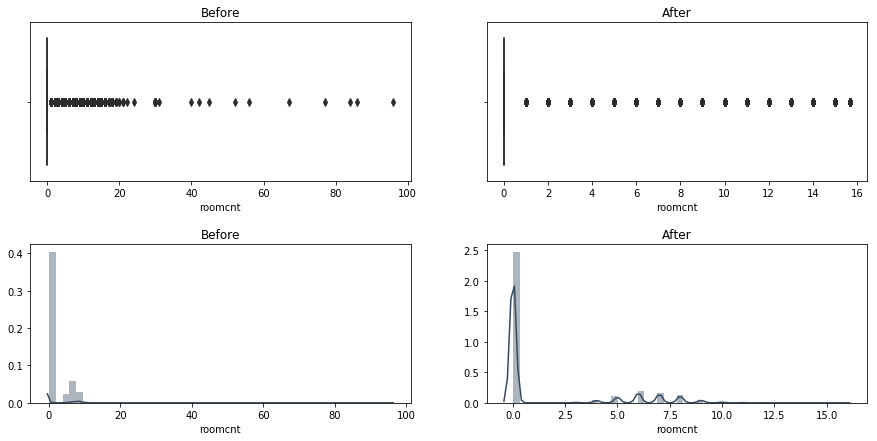

In [52]:
fix_outliers(dataset, 'roomcnt')

print('Before', dataset['roomcnt'].unique())
dataset['roomcnt'] = dataset['roomcnt'].fillna(1).astype(np.int32)
print('After', dataset['roomcnt'].unique())

### Variable: storytypeid - Type of floors in a multi-story house (i.e. basement and main level, split-level, attic, etc.). See tab for details.

Has datatype: nominal and 99.9 percent of values missing 

With 99% missing values, we decided to remove this variable.


In [53]:
del dataset['storytypeid']

### Variable: structuretaxvaluedollarcnt - the assessed value of the building

Has datatype: ratio and 1.46 percent of values missing

We replaced all missing values with the median assessed building tax. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


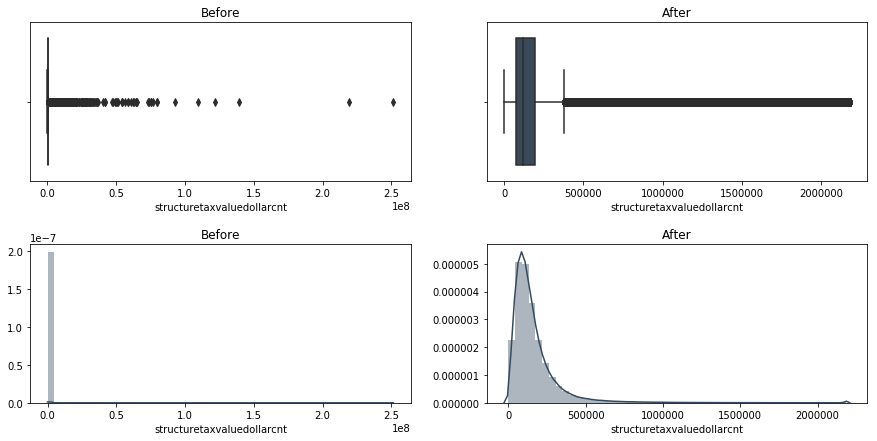

In [54]:
fix_outliers(dataset, 'structuretaxvaluedollarcnt')

medTax = np.nanmedian(dataset['structuretaxvaluedollarcnt'])

dataset['structuretaxvaluedollarcnt'] = dataset['structuretaxvaluedollarcnt'].fillna(medTax).astype(np.int32)

### Variable: taxamount - property tax for the assessment year

Has datatype: ratio and 0.66 percent of values missing

We replaced all missing values with the median property taxes for the assessment year. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


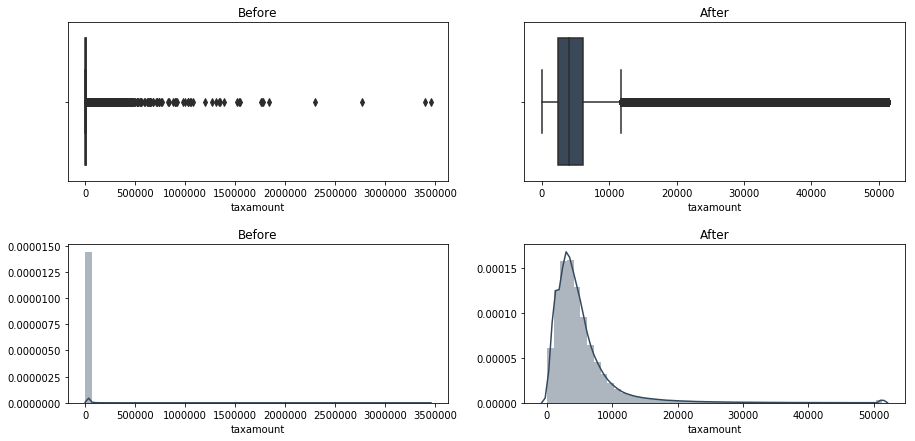

In [55]:
fix_outliers(dataset, 'taxamount')
median_value = dataset['taxamount'].median()
dataset['taxamount'] = dataset['taxamount'].fillna(median_value).astype(np.float32)

### Variable: taxdelinquencyflag - property taxes from 2015 that are past due

Has datatype: nominal and 98.10 percent of values missing

We replaced all missing values with 0 representing no past due property taxes and all Y values with 1 representing that there are past due property taxes. We changed the column datatype to integer.

In [56]:
print('Before', dataset['taxdelinquencyflag'].unique())
dataset['taxdelinquencyflag'] = dataset['taxdelinquencyflag'].fillna(0).replace('Y', 1).astype(np.int32)
print('After', dataset['taxdelinquencyflag'].unique())

Before [nan 'Y']
After [0 1]


### Variable: taxdelinquencyyear - years of delinquency

Has datatype: interval and 98.10 percent of values missing

We replaced all missing values with 0 representing no years of property tax delinquencies. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


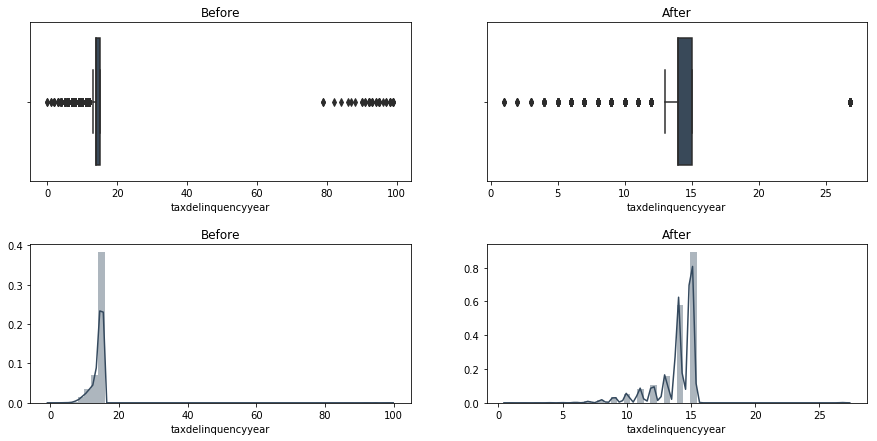

In [57]:
fix_outliers(dataset, 'taxdelinquencyyear')
dataset['taxdelinquencyyear'] = dataset['taxdelinquencyyear'].fillna(0).astype(np.int32)

### Variable: taxvaluedollarcnt - total tax 

Has datatype: ratio and 1.04 percent of values missing

We replaced all missing values with the median total tax amount. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


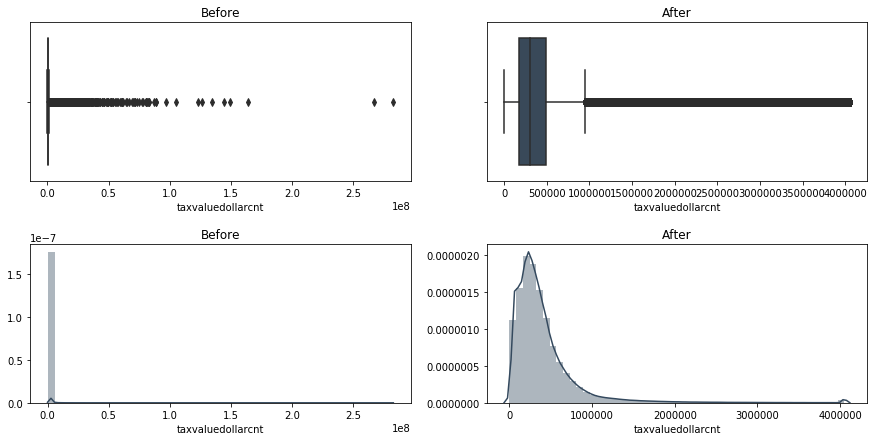

In [58]:
fix_outliers(dataset, 'taxvaluedollarcnt')
median_value = dataset['taxvaluedollarcnt'].median()
dataset['taxvaluedollarcnt'] = dataset['taxvaluedollarcnt'].fillna(median_value).astype(np.int32)

### Variable: threequarterbathnbr - Number of 3/4 bathrooms in house (shower + sink + toilet)

Has datatype: ordinal and 89.5 percent of values missing 

We replaced all missing values with 0 which will represent no Number of 3/4 bathrooms in the property. We changed the column datatype to integer.

In [59]:
print('Before', dataset['threequarterbathnbr'].unique())
dataset['threequarterbathnbr'] = dataset['threequarterbathnbr'].fillna(0).astype(np.int32)
print('After', dataset['threequarterbathnbr'].unique())

Before [ nan   1.   2.   4.   3.   6.   5.   7.]
After [0 1 2 4 3 6 5 7]


### Variable: typeconstructiontypeid - What type of construction material was used to construct the home

Has datatype: nominal and 99.7 percent of values missing 

With 99% missing values, we decided to remove this variable.

In [60]:
del dataset['typeconstructiontypeid']

### Variable: unitcnt - number of units in the building

Has datatype: ordinal and 33.5 percent of values missing

We replaced all missing values with 1 to represent a single family home for any with no values.  We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!
Before [nan, 2.0, 1.0, 3.0, 5.0, 4.0, 9.0, 13.420650857467523, '...']
After [ 1  2  3  5  4  9 13 12  6  7  8 10 11]


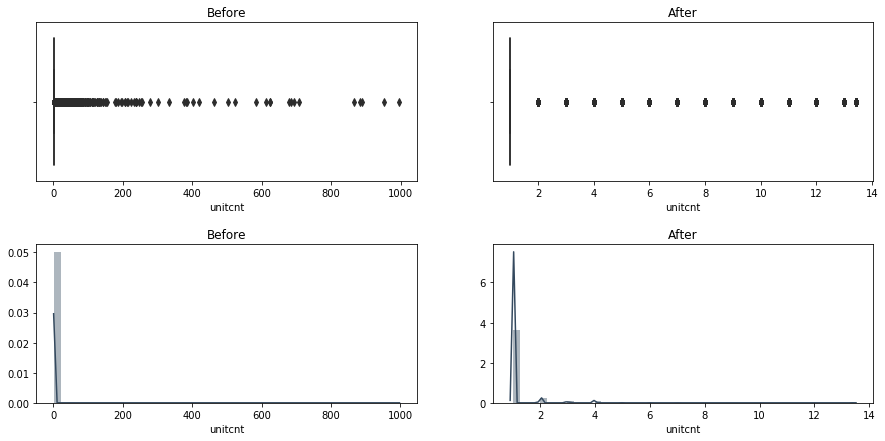

In [61]:
fix_outliers(dataset, 'unitcnt')

print('Before', dataset['unitcnt'].unique()[:8].tolist() + ['...'])
dataset['unitcnt'] = dataset['unitcnt'].fillna(1).astype(np.int32)
print('After', dataset['unitcnt'].unique())

### Variable: yardbuildingsqft17 - sq feet of patio in yard

Has datatype: interval and 97.29 percent of values missing

We replaced all missing values with 0 representing no patio. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


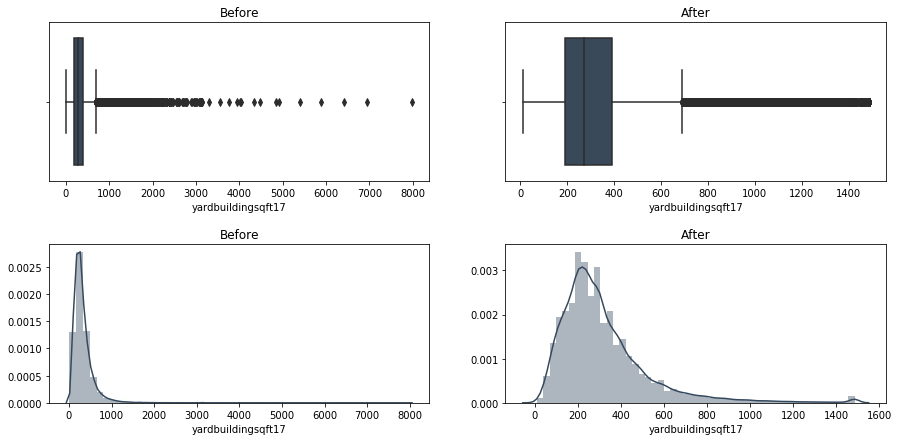

In [62]:
fix_outliers(dataset, 'yardbuildingsqft17')
dataset['yardbuildingsqft17'] = dataset['yardbuildingsqft17'].fillna(0).astype(np.int32)

### Variable: yardbuildingsqft26 - storage shed/building in yard

Has datatype: interval and 99.91 percent of values missing 

We replaced all missing values with 0 which will represent no (square ft) storage shed or building in the yard. We changed the column datatype to integer. We then replaced all outliers with a maximum and minimum value of (mean ± 5 * std), respectively.

Outliers found!


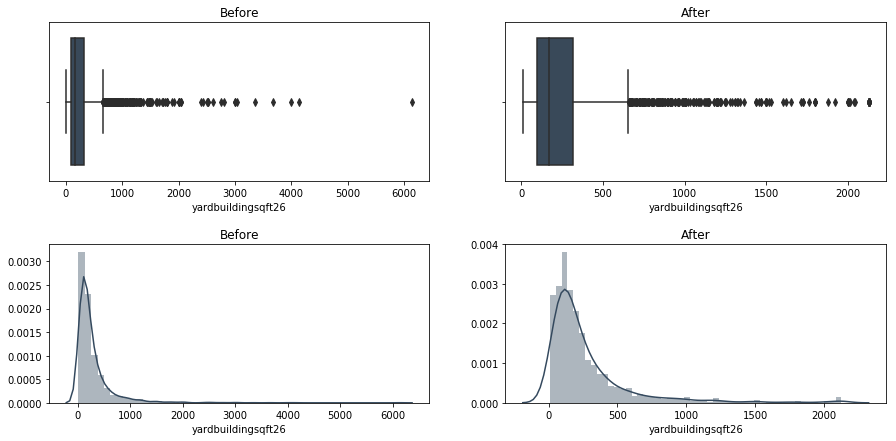

In [63]:
fix_outliers(dataset, 'yardbuildingsqft26')
dataset['yardbuildingsqft26'] = dataset['yardbuildingsqft26'].fillna(0).astype(np.float32)

### Variable: yearbuilt - The Year the residence was built

Has datatype: interval and 1.63 percent of values missing 

We replaced all missing values with the median year built of 1963 until we have a better method to impute. We changed the column datatype to integer.

In [64]:
print('Before', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])
medYear = dataset['yearbuilt'].median()
dataset['yearbuilt'] = dataset['yearbuilt'].fillna(medYear).astype(np.int32)
print('After', dataset['yearbuilt'].unique()[:8].tolist() + ['...'])

Before [nan, 1948.0, 1947.0, 1943.0, 1946.0, 1978.0, 1958.0, 1949.0, '...']
After [1963, 1948, 1947, 1943, 1946, 1978, 1958, 1949, '...']


<a id="Description_4"></a>
## Final verification of data quality

We went through every variable and next cell will confirm that the dataset has no missing values.

<a href="#top">⏫ Back to Top</a>

In [65]:
assert np.all(~dataset.isnull())

<a id="Description_5"></a>
## Meaning and type of data for each attribute in the data file after data cleaning

<a href="#top">⏫ Back to Top</a>

In [66]:
output_variables_table(variables, dataset)

Variable,Type,Scale,Meaning
airconditioningtypeid,nominal,"[0, 1, 13, 5, 11, 9, 12, 3]",Type of cooling system present in the home (if any)
assessmentyear,interval,"(2000, 2016)",The year of the property tax assessment
bathroomcnt,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (37 More)]",Number of bathrooms in home including fractional bathrooms
bedroomcnt,ordinal,"[0, 4, 5, 2, 3, ... (21 More)]",Number of bedrooms in home
buildingqualitytypeid,ordinal,"[7, 4, 10, 1, 12, ... (12 More)]",Overall assessment of condition of the building from best (lowest) to worst (highest)
calculatedbathnbr,ordinal,"[0.0, 2.0, 4.0, 3.0, 1.0, ... (35 More)]",Number of bathrooms in home including fractional bathroom
calculatedfinishedsquarefeet,ratio,"(0, 10926)",Calculated total finished living area of the home
censustractandblock,nominal,"[60375714234368.0, 61110011035648.0, 61110006841344.0, 61110002647040.0, 61110015229952.0, ... (457 More)]",Census tract and block ID combined - also contains blockgroup assignment by extension
finishedsquarefeet12,ratio,"(0, 6615)",Finished living area
finishedsquarefeet50,ratio,"(0, 31303)",Size of the finished living area on the first (entry) floor of the home


<a id="Description_6"></a>
## Table of Binary Variables (0 or 1)
We standardized all Yes/No and True/False variables to 1 or 0, respectively. The table below shows that all binary flags in this dataset represent rare features such a pool, hot tub, tax delinquency flag, and three quarter bathroom.

<a href="#top">⏫ Back to Top</a>

In [67]:
bin_vars = ['hashottuborspa', 'poolcnt', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'taxdelinquencyflag', 'threequarterbathnbr']
pd.DataFrame(dataset[bin_vars].mean() * 100, columns=['Percent with value equal to 1'])

,Percent with value equal to 1
hashottuborspa,2.320750
poolcnt,17.403238
pooltypeid2,1.078594
pooltypeid7,16.324644
pooltypeid10,1.242156
taxdelinquencyflag,1.898661
threequarterbathnbr,10.584172


<a id="save_state"></a>
## Save dataset state

We save the cleaned dataset in order to faster load.

<a href="#top">⏫ Back to Top</a>

In [68]:
dataset.to_csv('../../datasets/clean_dataset.csv', index=False)
variables = variables.loc[dataset.columns]

<a id="restore_state"></a>
# Restore Cleaned Dataset [CHECKPOINT]

Next cell will restore the cleanded dataset. You could run this cell instead of runing all above cleaning cells.

<a href="#top">⏫ Back to Top</a>

In [2]:
dataset = pd.read_csv('../../datasets/clean_dataset.csv')
variables = variables.loc[dataset.columns]

<a id="Attribute"></a>
# Attribute Visualizion
<b>10 points</b>

<i>
<b>Description:</b><br/>
Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.
</i>

<a href="#top">⏫ Back to Top</a>

<a id="Viz1"></a>
## Count of Bedrooms
We think that the number of bedrooms in a home could be interesting because our data was collected in California where rent is very high. It is common to buy a rental property and have tenents who will occupy each room.  As a renter, the more rooms means one more person and splitting the rent one more way. In our dataset, most properties have 3 bedrooms and we see fewer instances as we go up or down one bedroom in the data. Here we still see records without any bedrooms which we justified as studios above.  The bar chart below uses number of bedrooms as a category and counts the frequency of each category.

<a href="#top">⏫ Back to Top</a>

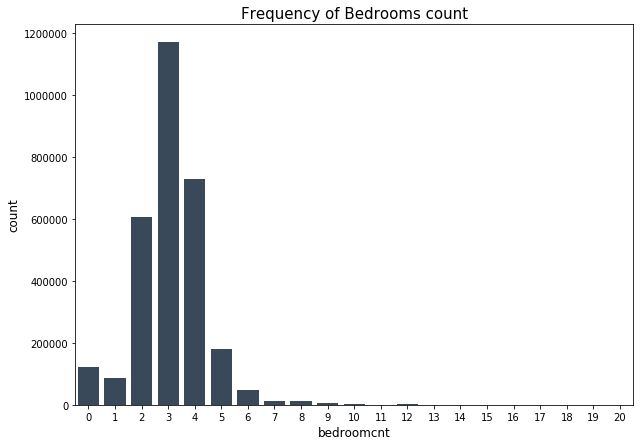

In [70]:
data = dataset
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.title("Frequency of Bedrooms count", fontsize=15)
sns.countplot(data['bedroomcnt'], color="#34495e");

<a id="Viz2"></a>
## Average Tax Per Square Feet

For our next attribute, we calculated the tax per square foot to see if we could find any trends.  We again chose to use a bar chart to plot the ratio and the sum counts.  What we found is that plotting this exposes extreme outliers for possible elimination. Most properties are under a few dollars per square foot but as the visualization reveals, there are suspicious records. However, because this is southern California and land space is limited for continuous growth, there could be a reason that some places have high tax per square feet due to better real estate areas.

<a href="#top">⏫ Back to Top</a>

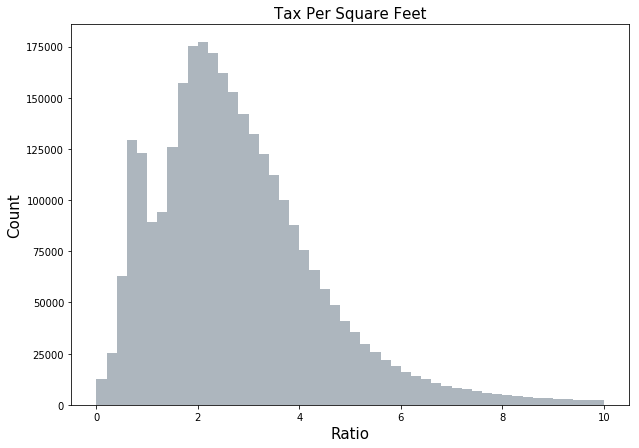

In [71]:
non_zero_mask = data['calculatedfinishedsquarefeet'] > 0
tax = data[non_zero_mask]['taxamount']
sqft = data[non_zero_mask]['calculatedfinishedsquarefeet']

tax_per_sqft = tax / sqft
tax_per_sqft = tax_per_sqft[tax_per_sqft<10]
sns.distplot(tax_per_sqft, color="#34495e", kde=False)

plt.title('Tax Per Square Feet', fontsize=15)
plt.xlabel('Ratio', fontsize=15)
plt.ylabel('Count', fontsize=15);

<a id="Viz3"></a>
## Continuous Variable Correlation Heatmap

Next we wanted to see a heatmap of correlations of our continuous variables.  The heapmap is displays correlation using the warmer colors to represent highly correlated variables, white as non-correlated, and colder colors is negatively correlated. We see that calculated finished square feet is correlated with finished square feet, due to collinearity. Tax amounts and year built are also highly correlated to finished square feet as well as with one another. 

Latitude and longitude are negatively correlated with each other possibly because the beachfront properties are more expensive.

<a href="#top">⏫ Back to Top</a>

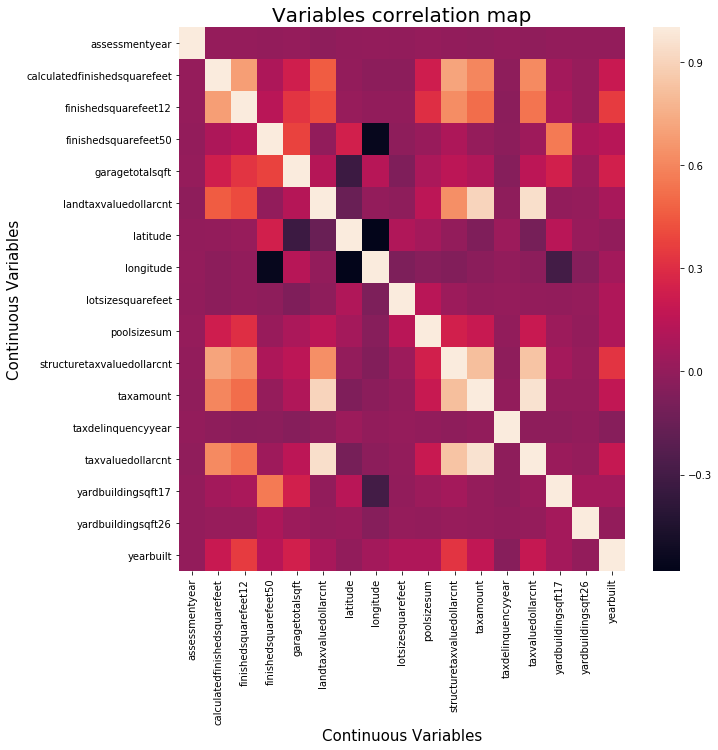

In [72]:
continuous_vars = variables[variables['type'].isin(['ratio', 'interval'])].index
continuous_vars = continuous_vars[continuous_vars.isin(data.columns)]
continuous_vars = continuous_vars.sort_values()

corrs = data[continuous_vars].corr()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrs, ax=ax)
plt.title("Variables correlation map", fontsize=20)
plt.xlabel('Continuous Variables', fontsize=15)
plt.ylabel('Continuous Variables', fontsize=15);

<a id="Viz4"></a>
## Longitude and Latitude Data Points
From a simple graph, we can see the shoreline of California as well as possible areas of obstruction, such as mountains or bodies of water that prevent property growth in those areas. The majority of properties are in the center to upper left of the graph.

<a href="#top">⏫ Back to Top</a>

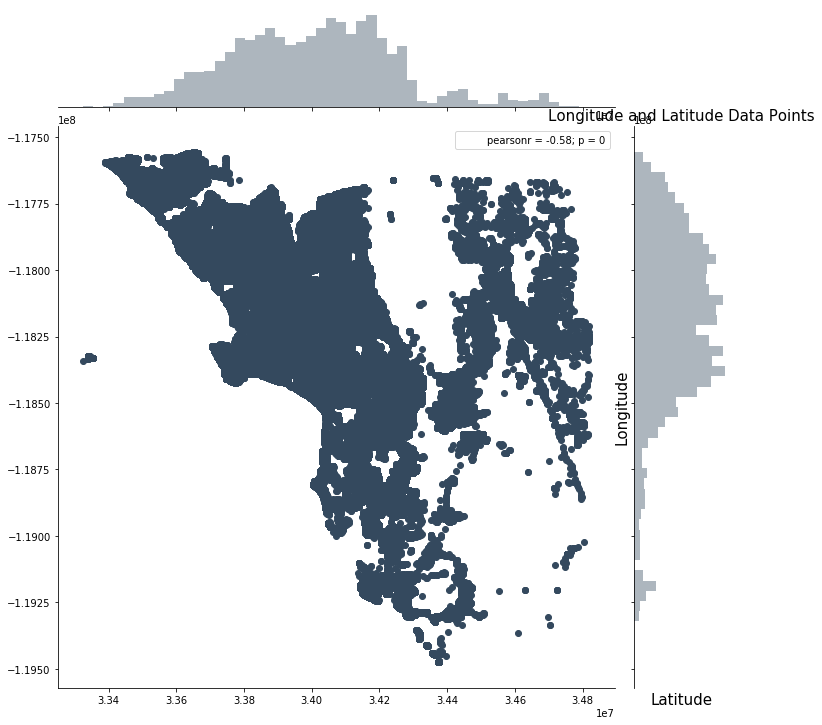

In [73]:
plt.figure(figsize=(12,12));
sns.jointplot(x=data.latitude.values, y=data.longitude.values, size=10, color="#34495e");
plt.ylabel('Longitude', fontsize=15)
plt.xlabel('Latitude', fontsize=15)
plt.title('Longitude and Latitude Data Points', fontsize=15);

<a id="Viz5"></a>
## Number of Stories vs Year Built
As architectural feats improved, we started to see more properties with 2 or more stories by 1950. The number of one story properties also increased during that time. The baby boomers, the end of WWII and readily available steel, and mortgage incentives may be the cause of the increase of more properties being built as well as more stories per property. Note: because we filled in missing values as the median value, the 1965 spike in the data is artificial until we use other methods to impute year built.

<a href="#top">⏫ Back to Top</a>

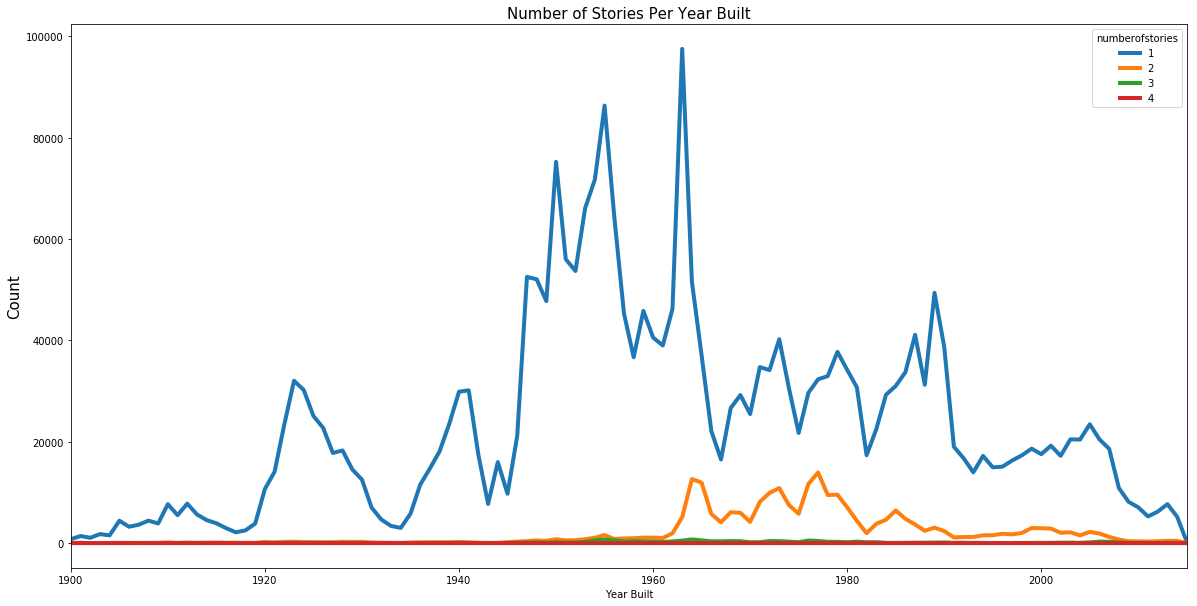

In [74]:
fig,ax1= plt.subplots()
fig.set_size_inches(20,10)
yearMerged = data.groupby(['yearbuilt', 'numberofstories'])["parcelid"].count().unstack('numberofstories').fillna(0)
yearMerged = yearMerged.loc[1900:]
yearMerged.index.name = 'Year Built'

plt.title('Number of Stories Per Year Built', fontsize=15)
plt.ylabel('Count', fontsize=15);

yearMerged.plot(ax=ax1, linewidth=4);

# Modeling and Evaluation,

Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

* [10 Points] Train and adjust parameters
* [10 Points] Evaluate and Compare
* [10 Points] Visualize Results
* [20 Points] Summarize the Ramifications

Option A: Cluster Analysis
* Train: Perform cluster analysis using several clustering methods (adjust parameters).
* Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters foreach method?
* Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
* Summarize: Describe your results. What findings are the most interesting and why?

<a id="Train"></a>
# Train and Adjust Parameters
<b>10 points</b>

<i>
<b>Description:</b><br/>
Perform cluster analysis using several clustering methods (adjust parameters).
</i>

<a href="#top">⏫ Back to Top</a>

### Utility functions
`calculate_max_distance` converts latitude and longitude into miles and measures the diagonal distance per cluster.
`cluster_analysis` uses metrics such as cityblock, cosine, and euclidean to apply the different clustering algorithm settings.
`get_dataset` uses taxamount as the weight to determine clusters by latitude and longitude.

In [10]:
import math
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import gc

def calculate_max_distance(group, radius = 3959):
    """
    This computes max distance from points in the cluster
    
    radius = 3959 # miles (some algorithms use 3956)
    radius = 6371 # kilometers (some algorithms use 6367)
    radius = 3959 * 5280 # feet
    radius = 6371 * 1000 # meters
    
    Refference: https://gist.github.com/rochacbruno/2883505
    """
    group.loc[:, 'latitude'] /= 1000000
    group.loc[:, 'longitude'] /= 1000000
    lat1, lon1 = group[['latitude','longitude']].min()
    lat2, lon2 = group[['latitude','longitude']].max()
    
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    distance = radius * c
    return distance

def cluster_analysis(data, labels, per_cluster=True):
    geo_scaler = data['geo_scaler']
    tax_scaler = data['tax_scaler']
    data = data['data'][['latitude', 'longitude', 'taxamount']]
    metrics = ['cityblock', 'cosine', 'euclidean']
    distances = []
    if per_cluster:
        # bacause of this measure runs out of memory will use subsample or 1000
        d = data.iloc[:10000]
        l = labels[:10000]
        for metric in metrics:
            data[metric] = np.nan

            data.loc[d.index, metric] = silhouette_samples(d, l, metric=metric)

        per_cluster_metrics = pd.DataFrame()
        for cluster_id, group in data.groupby(labels):
            row = group[metrics].mean()
            
            
            geo = geo_scaler.inverse_transform(group[['latitude', 'longitude']])
            geo = pd.DataFrame(geo, columns=['latitude', 'longitude'])
            
            mean_tax = tax_scaler.inverse_transform(group[['taxamount']]).mean()
            
            row['distance in miles'] = calculate_max_distance(geo)
            row['avg tax'] = mean_tax
            row['cluster_id'] = int(cluster_id)
            
            distances.append(row['distance in miles'])
            per_cluster_metrics = per_cluster_metrics.append([row])
            gc.collect()
        per_cluster_metrics['cluster_id'] = per_cluster_metrics['cluster_id'].astype(int)
        per_cluster_metrics = per_cluster_metrics.set_index('cluster_id')
    else:
        per_cluster_metrics = None
    
    avg_metrics = {}
    d = data[['latitude', 'longitude', 'taxamount']].iloc[:10000]
    l = labels[:10000]
    for metric in metrics:
        avg_metrics[metric] = silhouette_score(d, l, metric=metric)

    avg_metrics = pd.DataFrame([avg_metrics], index = ['Average for all Clusters'])
    
    if not len(distances):
        for cluster_id, group in data.groupby(labels):
            geo = geo_scaler.inverse_transform(group[['latitude', 'longitude']])
            geo = pd.DataFrame(geo, columns=['latitude', 'longitude'], index=group.index)
            
            distances.append(calculate_max_distance(geo))
        
    avg_metrics['avg distance'] = np.mean(distances)
    gc.collect()
    return per_cluster_metrics, avg_metrics

def get_dataset(geo_importance_weight=5, n=None):
    """
    @param geo_importance_weight: of 2 will have 2x more weight
        on the geo variables compared to taxamount variable
    @param n: random sample size
    
    """
    data = dataset[['latitude', 'longitude', 'taxamount']].copy()
    if n is not None:
        data = data.sample(n=n, random_state=0)
    else:
        data = data.sample(frac=1, random_state=0)

    # range from 0 to geo_importance_weight
    geo_scaler = MinMaxScaler((0, geo_importance_weight))
    # range from 0 to 1
    tax_scaler = MinMaxScaler((0, 1))

    data.loc[:, ['latitude', 'longitude']] = geo_scaler.fit_transform(data[['latitude', 'longitude']])
    data.loc[:, ['taxamount']] = tax_scaler.fit_transform(data[['taxamount']])
    return dict(
        data=data[['latitude', 'longitude', 'taxamount']],
        geo_scaler=geo_scaler, tax_scaler=tax_scaler)

## Dataset for clustering

We chose to cluster based on the location and the tax amount of the property. Because the variables are on different scales, the clustering algorithms will give more weight to the variable with the greater range such as latitude and longitude and will ignore the variable taxamount. Our goal is to find out the best place to put up an office with a location that reaches an optimal number of people with similar wealth standings. We want these locations to be determined mostly by geo location variables and less of the taxamount variable so we will give the geo data variables range of 5 times the taxamount.

In [4]:
default_n_clusters = 20
clustering_data = get_dataset(geo_importance_weight=5)
clustering_data['data'].shape

(2973780, 3)

<a id="train_kmeans"></a>

## KMeans
K-means is an iterative algorithm which assigns data points to the nearest centroid and updates the centroids each pass until convergence or predetermined number of iterations is met.  Mini-batch k-means is a variant of the k-means algorithm which uses a smaller subset of the data with the idea that it will converge faster thus reducing the computation time.  In comparison to the other ways to reduce convergence, mini-batch produces results that are typically only slightly worse than k-means.  In practice, we get as expected, where mini-batch runs faster but produces slightly worse results.

<a href="#top">⏫ Back to Top</a>

In [5]:
from sklearn.cluster import KMeans, MiniBatchKMeans

cls = MiniBatchKMeans(n_clusters=default_n_clusters, random_state=0)
start = time.time()
cls.fit(clustering_data['data'])
labels = cls.predict(clustering_data['data'])
centroids = cls.cluster_centers_
per_cluster_metrics, avg_metrics = cluster_analysis(clustering_data, labels)
avg_metrics['time (s)'] = time.time() - start

result_kmeans = dict(
    per_cluster_metrics=per_cluster_metrics,
    avg_metrics=avg_metrics,
    labels=labels,
    centroids=centroids
)

### KMeans analysis of metrics for all clusters
Below is the average for each metric over all clusters.

In [6]:
result_kmeans['avg_metrics']

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.355503,0.034887,0.373767,31.703798,49.075335


### KMeans analysis of metrics per cluster
Below is the computed metric for each cluster.

In [7]:
result_kmeans['per_cluster_metrics']

,cityblock,cosine,euclidean,distance in miles,avg tax
cluster_id,,,,,
0,0.324215,-0.316138,0.333242,17.591598,3749.869692
1,0.356664,0.157437,0.362923,42.333588,4419.613991
2,0.383589,0.100660,0.421056,36.153547,5532.587534
3,0.257588,-0.055478,0.277160,16.520377,5193.487144
4,0.678426,-0.292101,0.679698,55.860882,3107.399139
5,0.442434,0.579832,0.440335,27.405530,6030.052148
6,0.304464,0.147758,0.341180,23.673492,4707.531340
7,0.344467,-0.009489,0.349611,17.229851,3232.408885
8,0.378121,0.039605,0.403743,35.314878,4292.030427


### KMeans Clustering Parameter Adjusting

We will be optimizing the paramether "batch_size" which represents the size of the mini batches.


In [11]:
result = pd.DataFrame()
for batch_size in [10, 50, 100, 200]:
    start = time.time()
    cls = MiniBatchKMeans(n_clusters=default_n_clusters, batch_size=batch_size, random_state=0)

    cls.fit(clustering_data['data'])
    labels = cls.predict(clustering_data['data'])
    
    per_cluster_metrics, avg_metrics = cluster_analysis(clustering_data, labels, per_cluster=False)
    avg_metrics['time (s)'] = time.time() - start

    avg_metrics['batch_size'] = batch_size
    result = result.append(avg_metrics)
result.set_index('batch_size')

,cityblock,cosine,euclidean,avg distance,time (s)
batch_size,,,,,
10,0.347944,-0.005536,0.359924,31.049563,125.202521
50,0.351132,-0.013555,0.366299,29.146584,47.439742
100,0.355503,0.034887,0.373767,31.703798,34.720451
200,0.340701,0.002489,0.355161,29.476861,28.623267


### KMeans Clustering adjusting of geo importance  vs taxamount

Below we will be testing what each cluster looks like as we give longitude and latitude more weight of importance in the calculation.  As we give more weight (up to 5 or 10 times), we have more defined location clusters.  While a factor of 10 is optimal, we think a factor of 5 is good enough for our purposes.  With less weight (1 times importance), we see clusters mixed inside other clusters.

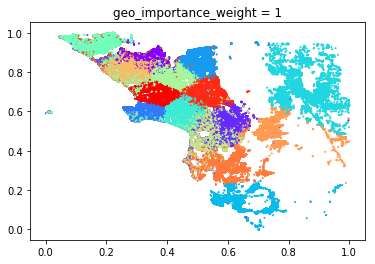

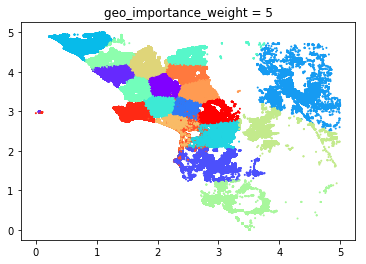

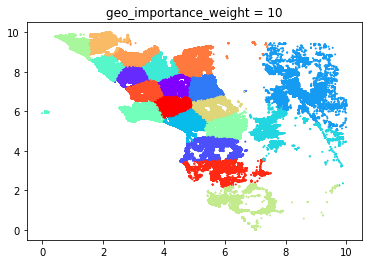

,cityblock,cosine,euclidean,avg distance,time (s)
geo_importance_weight,,,,,
1,0.304054,0.094248,0.307797,51.380632,22.885316
5,0.355503,0.034887,0.373767,31.703798,35.617127
10,0.363667,0.015267,0.379081,28.425615,38.116146


In [12]:
result = pd.DataFrame()

for geo_importance_weight in [1, 5, 10]:
    data = get_dataset(geo_importance_weight=geo_importance_weight)
    start = time.time()
    cls = MiniBatchKMeans(n_clusters=default_n_clusters, random_state=0)
    cls.fit(data['data'])
    labels = cls.predict(data['data'])
    
    per_cluster_metrics, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['time (s)'] = time.time() - start
    
    avg_metrics['geo_importance_weight'] = geo_importance_weight
    result = result.append(avg_metrics)
    
    plt.title('geo_importance_weight = %d' % geo_importance_weight)
    d = data['data']
    plt.scatter(d['latitude'], d['longitude'], c=labels, cmap=plt.cm.rainbow, s=1)
    plt.show()
    
result.set_index('geo_importance_weight')

<a id="train_spectral"></a>

## Spectral Clustering

Spectral clustering uses the eigenvalues of the similarity matrix to reduce dimensions before clustering.  In practice, this is very useful when the structure of the individual clusters is highly non-convex or more generally when a measure of the center and spread of the cluster is not a suitable description of the complete cluster, such as when clusters are nested circles on the 2D plan.  Since we are working with geo data, our dataset should be a good candidate for this type of clustering.

We can only use this clustering algorithm with a subset of our data because it takes too much memory when used with the whole dataset. We chose to use a subset of 10000 observations.

<a href="#top">⏫ Back to Top</a>

In [13]:
from sklearn.cluster import SpectralClustering

gc.collect()

data = get_dataset(geo_importance_weight=5, n=10000)

cls = SpectralClustering(n_clusters=default_n_clusters, random_state=0)
start = time.time()

cls.fit(data['data'])
labels = cls.labels_

per_cluster_metrics, avg_metrics = cluster_analysis(data, labels)
avg_metrics['time (s)'] = time.time() - start

result_spectral = dict(
    data=data,
    per_cluster_metrics=per_cluster_metrics,
    avg_metrics=avg_metrics,
    labels=labels
)

### Spectral Clustering analysis of metrics for all clusters
Below is the average for each metric over all clusters.

In [14]:
result_kmeans['avg_metrics']

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.355503,0.034887,0.373767,31.703798,49.075335


### Spectral Clustering analysis of metrics per cluster

Below is the computed metric for each cluster.

In [15]:
result_kmeans['per_cluster_metrics']

,cityblock,cosine,euclidean,distance in miles,avg tax
cluster_id,,,,,
0,0.324215,-0.316138,0.333242,17.591598,3749.869692
1,0.356664,0.157437,0.362923,42.333588,4419.613991
2,0.383589,0.100660,0.421056,36.153547,5532.587534
3,0.257588,-0.055478,0.277160,16.520377,5193.487144
4,0.678426,-0.292101,0.679698,55.860882,3107.399139
5,0.442434,0.579832,0.440335,27.405530,6030.052148
6,0.304464,0.147758,0.341180,23.673492,4707.531340
7,0.344467,-0.009489,0.349611,17.229851,3232.408885
8,0.378121,0.039605,0.403743,35.314878,4292.030427


### Spectral Clustering adjusting of geo importance vs taxamount
We will be testing what each cluster looks like as we give longitude and latitude more weight of importance in the calculation.  With less weight (1 times importance), we see clusters mixed inside other clusters.  At 5 times importance we see a huge difference and clearer defined lines.  At 10 times importance, we see even better results.

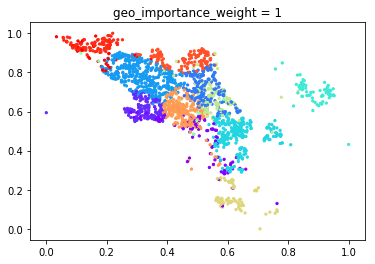

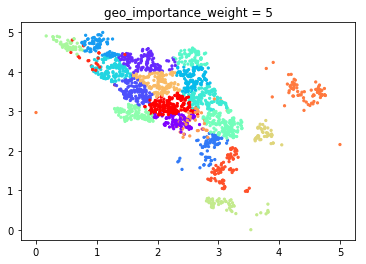

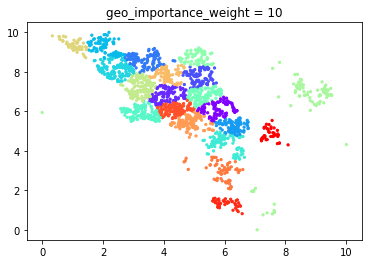

,cityblock,cosine,euclidean,avg distance,time (s)
geo_importance_weight,,,,,
1,0.133197,-0.180581,0.145653,29.073174,13.235162
5,0.339379,-0.030672,0.352804,25.443765,1.547900
10,0.350680,-0.025853,0.366981,23.376346,1.658229


In [42]:
gc.collect()

result = pd.DataFrame()

for geo_importance_weight in [1, 5, 10]:
    data = get_dataset(geo_importance_weight=geo_importance_weight, n=2000)
    start = time.time()
    cls = SpectralClustering(n_clusters=default_n_clusters, random_state=1)
    
    cls.fit(data['data'])
    labels = cls.labels_

    per_cluster_metrics, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['time (s)'] = time.time() - start
    
    avg_metrics['geo_importance_weight'] = geo_importance_weight
    result = result.append(avg_metrics)
    
    plt.title('geo_importance_weight = %d' % geo_importance_weight)
    d = data['data']
    plt.scatter(d['latitude'], d['longitude'], c=labels, cmap=plt.cm.rainbow, s=5)
    plt.show()
    
result.set_index('geo_importance_weight')

<a id="train_agglomerative"></a>

## Agglomerative Clustering

Agglomerative clustering is a hierarchical algorithm which uses a bottom up approach where each observation starts in its own cluster while pairs of clusters are merged as they move up the hierarchy.  This algorithm recursively merges the pair of clusters that minimally increases a given linkage distance.  Because the linkage criteria determines the metric used for the merge strategy, we will be playing around with all 3 criteria: ward, maximum, and average for analysis.


<a href="#top">⏫ Back to Top</a>

In [17]:
from sklearn.cluster import AgglomerativeClustering
gc.collect()

data = get_dataset(geo_importance_weight=geo_importance_weight, n=10000)

start = time.time()
cls = AgglomerativeClustering(n_clusters=default_n_clusters)

cls.fit(data['data'])
labels = cls.labels_

per_cluster_metrics, avg_metrics = cluster_analysis(data, labels)
avg_metrics['time (s)'] = time.time() - start

result_agglomerative = dict(
    data=data,
    per_cluster_metrics=per_cluster_metrics,
    avg_metrics=avg_metrics,
    labels=labels
)

### Agglomerative Clustering analysis of metrics for all clusters
Below is the average for each metric over all clusters.

In [18]:
result_agglomerative['avg_metrics']

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.331196,-0.015412,0.344088,24.406819,22.629658


### Agglomerative Clustering analysis of metrics per cluster
Below is the computed metric for each cluster.

In [19]:
result_agglomerative['per_cluster_metrics']

,cityblock,cosine,euclidean,distance in miles,avg tax
cluster_id,,,,,
0,0.122623,-0.034710,0.123429,22.563738,7197.797518
1,0.402692,0.268240,0.407879,28.304710,5808.560448
2,0.665282,-0.635519,0.662770,60.525310,3122.160959
3,0.498868,0.759913,0.525039,44.736116,3835.721364
4,0.355579,-0.770873,0.366781,42.032360,6018.263234
5,0.167627,0.043155,0.184066,20.457294,3372.856076
6,0.149711,-0.567253,0.170426,22.645010,4672.615480
7,0.274471,0.253746,0.293380,18.114136,4018.651791
8,0.235254,-0.032514,0.227807,22.581685,4590.108659


### Agglomerative Clustering Parameter Adjusting

We will serch for best "linkage" paramether. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

Possable values are:
    - "ward" minimizes the variance of the clusters being merged.
    - "average" uses the average of the distances of each observation of the two sets.
    - "complete" or maximum linkage uses the maximum distances between all observations of the two sets.
    
From our results, we believe "complete" is the best "linkage" parameter.

In [20]:
result = pd.DataFrame()
data = get_dataset(geo_importance_weight=geo_importance_weight, n=10000)


for linkage in 'average', 'complete', 'ward':
    start = time.time()
    cls = AgglomerativeClustering(n_clusters=default_n_clusters, linkage=linkage)
    cls.fit(data['data'])
    labels = cls.labels_
    
    per_cluster_metrics, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['time (s)'] = time.time() - start
    avg_metrics['linkage'] = linkage
    result = result.append(avg_metrics)
result.set_index('linkage')

,cityblock,cosine,euclidean,avg distance,time (s)
linkage,,,,,
average,0.342456,-0.077231,0.346175,21.599076,13.535135
complete,0.328682,-0.014180,0.341568,22.010295,13.828021
ward,0.331196,-0.015412,0.344088,24.406819,12.993742


### Agglomerative Clustering adjusting of geo importance  vs taxamount
Same optimization on weight of importance as the above two algorithms.  Weight of 1 is not enough as we see clusters inside of other clusters.  Between importance of 5 or 10 we do not see any distinct advantages of using a weight of 5 vs 10.  

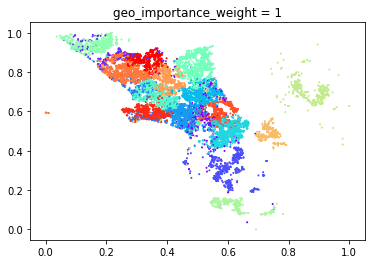

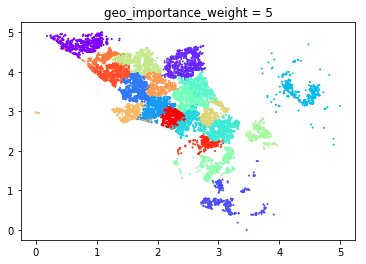

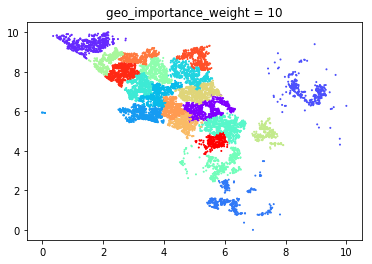

,cityblock,cosine,euclidean,avg distance,time (s)
geo_importance_weight,,,,,
1,0.265413,0.037773,0.267870,38.148699,13.323785
5,0.320318,0.052191,0.332429,25.702175,12.641800
10,0.331196,-0.015412,0.344088,24.406819,12.416063


In [22]:
result = pd.DataFrame()

for geo_importance_weight in [1, 5, 10]:
    data = get_dataset(geo_importance_weight=geo_importance_weight, n=10000)
    start = time.time()
    cls = AgglomerativeClustering(n_clusters=default_n_clusters)

    cls.fit(data['data'])
    labels = cls.labels_
    
    per_cluster_metrics, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['time (s)'] = time.time() - start
    
    avg_metrics['geo_importance_weight'] = geo_importance_weight
    result = result.append(avg_metrics)
    
    plt.title('geo_importance_weight = %d' % geo_importance_weight)
    d = data['data']
    plt.scatter(d['latitude'], d['longitude'], c=labels, cmap=plt.cm.rainbow, s=1)
    plt.show()
    
result.set_index('geo_importance_weight')

<a id="Evaluate"></a>
# Evaluate and Compare
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use internal and/or external validation measures to describe and compare the clusterings and the clusters — how did you determine a suitable number of clusters for each method?
</i>

<a href="#top">⏫ Back to Top</a>

## Evaluation metrics

In lab 2, we evaluated regression algorithms using metrics involving counts of the hits and misses.  For clustering, we will use distance metrics as our evaluation metric: cosine, Euclidean (also known as l2), Manhattan (also known as l1), city block, and average distance in miles.   We want a metric which maximizes the distance between samples in different classes, and minimizes that within each class.  

Cosine similarity measures the cosine of the angle between two given vectors (clusters).  Cosine is good for length normalization and where we have sparse vectors.  The Manhattan/ City Block/ L1 distance is the sum of the absolute value of error and the Euclidean/ L2 distance is the square root of the sum of squared error.



## KMeans metrics for different number of clusters
Below we will be iterating over the number of clusters in Kmeans, keeping all else constant, and finding the optimal values for our metrics described above.

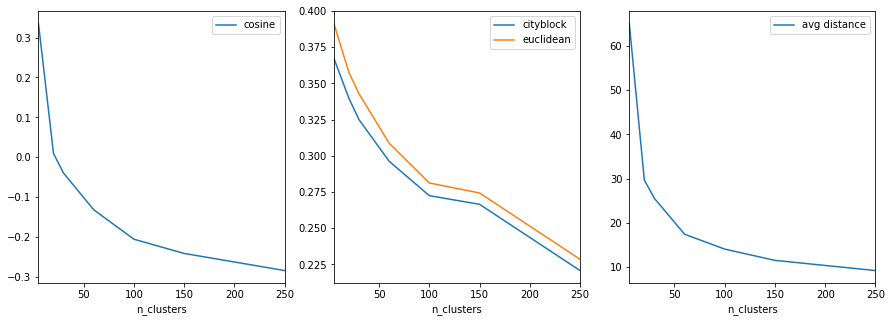

In [23]:
result = pd.DataFrame()

for n_clusters in [5, 20, 30, 60, 100, 150, 250]:
    cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=1)
    labels = cls.fit_predict(clustering_data['data'])
    
    _, avg_metrics = cluster_analysis(clustering_data, labels, per_cluster=False)
    avg_metrics['n_clusters'] = n_clusters

    result = result.append(avg_metrics)
result = result.set_index('n_clusters')

f, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 5])

all_others = result.columns
all_others = all_others[~all_others.isin(['cosine', 'avg distance'])]

result[['cosine']].plot(ax=ax[0])
result[all_others].plot(ax=ax[1])
result[['avg distance']].plot(ax=ax[2]);

### KMeans Table of result
Results of each value for each metric at every cluster number.  The metrics typically improved as the number of clusters grew.  For 5 clusters, the metrics were fairly high for cityblock and Euclidean and very high for cosine and average distance.  At 20 clusters the metrics improved drastically for cosine and average distance while only decreasing slightly for the others.  The optimization gain for choosing 30+ clusters, while our metrics for evalualtion improved, was minimal.  For those reasons, we think that 20 clusters is best for our mini batch k means algorithm.

In [24]:
result

,cityblock,cosine,euclidean,avg distance
n_clusters,,,,
5,0.367361,0.335329,0.391369,65.076456
20,0.339633,0.009170,0.357490,29.647947
30,0.324948,-0.039916,0.342815,25.538267
60,0.296218,-0.131717,0.308675,17.424989
100,0.272421,-0.205558,0.281194,14.056930
150,0.266438,-0.241188,0.274284,11.510833
250,0.220700,-0.284070,0.228483,9.214139


## Spectral Clustering metrics for different number of clusters
Below we will be iterating over the number of clusters in sprectral clustering, keeping all else constant, and finding the optimal values for our metrics described above.

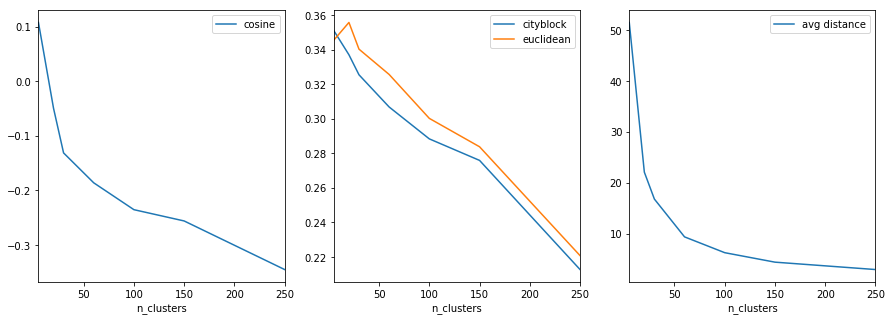

In [25]:
result = pd.DataFrame()

data = get_dataset(n=1000)

for n_clusters in [5, 20, 30, 60, 100, 150, 250]:
    cls = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors')
    
    labels = cls.fit_predict(data['data'])
    
    _, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['n_clusters'] = n_clusters

    result = result.append(avg_metrics)
result = result.set_index('n_clusters')

f, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 5])

all_others = result.columns
all_others = all_others[~all_others.isin(['cosine', 'avg distance'])]

result[['cosine']].plot(ax=ax[0])
result[all_others].plot(ax=ax[1])
result[['avg distance']].plot(ax=ax[2]);

### Spectral clustering result table
Again, the metrics typically improved as the number of clusters grew. For 5 clusters, the average distance was extremely high. Similar to kmeans, at 20 clusters the metrics improved drastically for cosine and average distance while still increasing slightly for the other metrics. At 30 clusters, we continued to see improvements in values for each metric while tapering off optimization gain vs number of clusters at 60+. For that reason, we think that 30 clusters is best for our spectral clustering algorithm.

In [26]:
result

,cityblock,cosine,euclidean,avg distance
n_clusters,,,,
5,0.351071,0.107743,0.345643,51.506446
20,0.337125,-0.049469,0.355856,22.061493
30,0.325531,-0.131322,0.340384,16.771871
60,0.306882,-0.186111,0.325726,9.341542
100,0.288397,-0.235345,0.300275,6.232520
150,0.275929,-0.256016,0.283825,4.369496
250,0.212694,-0.345050,0.220769,2.918112


## Agglomerative Clustering  metrics for different number of clusters
Below we will be iterating over the number of clusters in agglomerative clustering, keeping all else constant, and finding the optimal values for our metrics described above.

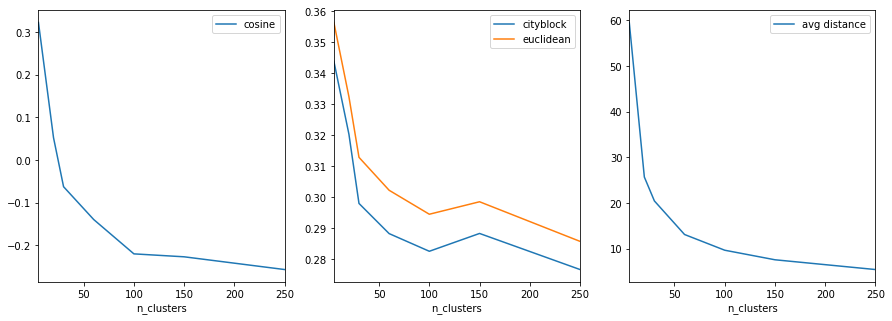

In [28]:
result = pd.DataFrame()
data = get_dataset(n=10000)

for n_clusters in [5, 20, 30, 60, 100, 150, 250]:
    cls = AgglomerativeClustering(n_clusters=n_clusters)
    
    labels = cls.fit_predict(data['data'])
    
    _, avg_metrics = cluster_analysis(data, labels, per_cluster=False)
    avg_metrics['n_clusters'] = n_clusters

    result = result.append(avg_metrics)
result = result.set_index('n_clusters')

f, ax = plt.subplots(nrows=1, ncols=3, figsize=[15, 5])

all_others = result.columns
all_others = all_others[~all_others.isin(['cosine', 'avg distance'])]

result[['cosine']].plot(ax=ax[0])
result[all_others].plot(ax=ax[1])
result[['avg distance']].plot(ax=ax[2]);

### Agglomerative clustering table of result
Agglomerative clustering results for each number of clusters was interesting.  At 5 clusters, we saw similar results to the above two algorithms where city block and Euclidean were okay but cosine and average distance were poor.  What is interesting about there results is that 20, 30, 60, 100, 150, and 250 all have fairly similar city block and Euclidean values.  The cosine typically increases for each and average distance certainly decreases with the number of clusters.  Since we didn't see too much of a payoff in cosine, we think that 20 is an okay enough number of clusters for our agglomerative clustering algorithm.

In [29]:
result

,cityblock,cosine,euclidean,avg distance
n_clusters,,,,
5,0.343922,0.322684,0.356447,59.560990
20,0.320318,0.052191,0.332429,25.702175
30,0.297981,-0.062893,0.312876,20.468863
60,0.288237,-0.139920,0.302236,13.118925
100,0.282526,-0.220496,0.294492,9.674978
150,0.288284,-0.227393,0.298523,7.581760
250,0.276626,-0.257279,0.285725,5.443601


<a id="Visualize"></a>
# Visualize Results
<b>10 points</b>

<i>
<b>Description:</b><br/>
Use tables/visualization to discuss the found results. Explain each visualization in detail.
</i>


<a href="#top">⏫ Back to Top</a>

For each clustering algorithm, we have printed a visual map color coded with each cluster as well as the average metrics over all clusters for that algorithm.  In addition to our comparison metrics, we also printed the time in seconds it took to run each algorithm.

In [30]:
def visualize_labels(clustering_data, labels, centroids=None):

    plt.figure(figsize=(10, 8))
    
    for cluster_id in np.unique(labels):
        d = clustering_data[labels == cluster_id]
        label = 'Cluster #' + str(cluster_id)
        plt.scatter(d['latitude'], d['longitude'], label=label, s=1)
    plt.legend()
    
    #plt.scatter(data['latitude'], data['longitude'], c=labels, cmap=plt.cm.rainbow, s=5)
    plt.axis('off')
    if centroids is not None:
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', s=200, linewidths=3, color='k')
    plt.show()

### KMeans Clustering visualization
Below is the final result of our optimized mini batch k means clustering algorithm.  The black crosses on the visualization show the position of the centroids (middle of the cluster).  Most of the 20 clusters are well defined although in denser regions the clusters become mixed.  There is one cluster number 10 in grey below which appears as if we could not draw straight lines among its borders but overall, the visual results look really good.

Jumping ahead, of the three algorithms, kmeans had the highest cityblock, cosine, Euclidean, and average distance and was only slightly faster than spectral clustering.  Metrics wise, kmeans performed worst.

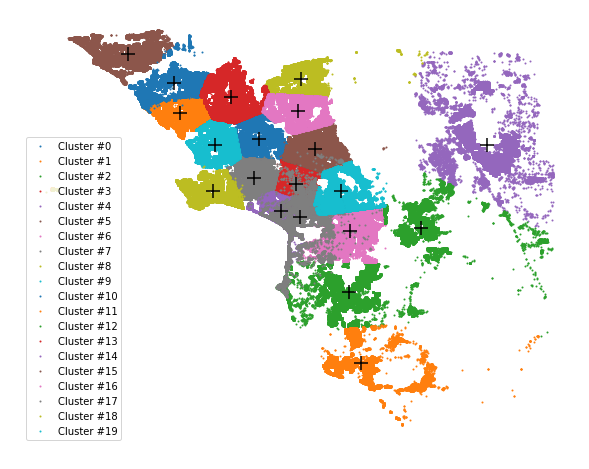

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.355503,0.034887,0.373767,31.703798,49.075335


In [31]:
visualize_labels(clustering_data['data'], result_kmeans['labels'], result_kmeans['centroids'])
result_kmeans['avg_metrics']

### Spectral Clustering Visualization
Below are the results of our optimized spectral clustering algorithm.  Just like our kmeans algorithm above, the boundaries of each cluster look to be clearly defined.  However, in certain sparser areas,  a few clusters look to have undefined borders.  On the whole, the visual boundaries look very good.

Numbers-wise this algorithm performed the bestin cityblock, cosine, and Euclidean distance compared to the other two algorithms we looked at. The average distance was slightly better than kmeans and the time in seconds was the longest of the three algorithms.  Spectral clustering does not look like it handles the sparse areas as well but handled the more dense regions very well which is why it is visually not as easy to detect its performance.

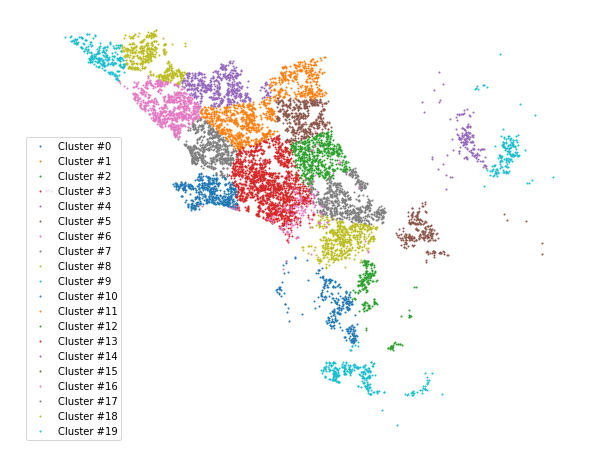

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.287064,-0.065324,0.30586,29.991496,55.394365


In [35]:
visualize_labels(result_spectral['data']['data'], result_spectral['labels'])
result_spectral['avg_metrics']

### Agglomerative Clustering visualization
Visually, the agglomerative clustering algorithm would seem like it performed the best out of the three algorithms.  The denser areas of data points look to be mixed with clusters overlapping each other.  This algorithm also looks like it handled the sparse areas very well.

The average distance in the clusters was the smallest of the three algorithms and the time it took to run way 3 times faster than the others.  Cityblock, cosine, and Euclidean distance all came in second.

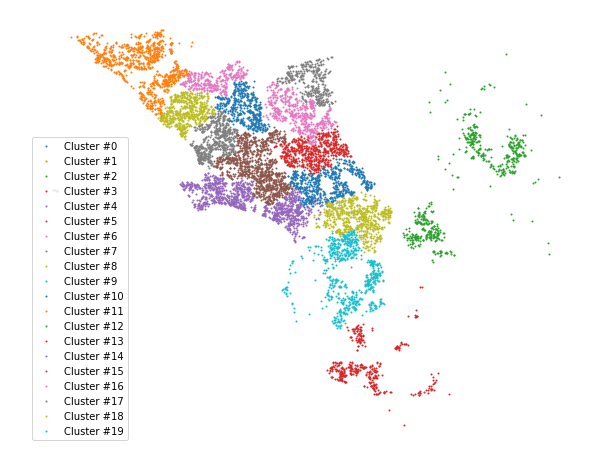

,cityblock,cosine,euclidean,avg distance,time (s)
Average for all Clusters,0.331196,-0.015412,0.344088,24.406819,22.629658


In [37]:
visualize_labels(result_agglomerative['data']['data'], result_agglomerative['labels'])
result_agglomerative['avg_metrics']

<a id="Ramifications"></a>
# Summarize the Ramifications
<b>20 points</b>

<i>
<b>Description:</b><br/>
Describe your results. What findings are the most interesting and why?
</i>

# TODO someone else should read over this section and add on as it is worth 20 points

<a href="#top">⏫ Back to Top</a>

In our visualizations, we were able to see clearly defined clusters around what we think could be cities or counties.  Our dataset is around the Los Angeles, Orange County area which is made up of many smaller suburbs often separated from each other by class or wealth such as Beverly Hills neighboring South Los Angeles near Compton.

For our business purposes, we wanted to place 20 offices in the area but we wanted to spread them out geographically and place them where they would reach the most customers of a tailored wealth, defined by `tax_amount`.  As stated above, spectral clustering did the best job of clustering areas where we would like to place our business offices in the epicenter per cluster.  We also liked that the number of data points inside each of the 20 clusters is fairly large.  By fairly large, we mean that the sparse location points were set to the closest cluster instead of creating its own cluster which we were afraid of.  Per our observations, this algorithm handled both sparse and dense areas very well.  On paper, it performed the best for almost every metric against the other two algorithms except for average distance where it was a close second.  Time is our main concern as we only ran the algorithm on a subset of the data and it still took the longest to run.

As noted above, not only did we want to find a good location for each office, we also wanted to tailor the interiors and offerings at each office to each wealth class.  To determine this, we looked at the average tax amount in each cluster.  Spectral did a good job of maximizing the differences between these averages which tells us that we have better boundaries of where to place higher end offices, our highest mean tax of 9235, and common offices, our lowest mean tax of 3026.

Another interesting thing we found is that while we were evaluating each clustering algorithm, we were mainly looking at the average cosine or l1 and l2 of all of the clusters.  We didn't make mention of the min and max of the values of all clusters.  When we looked into this, the ranges for kmeans was smaller than the ranges for agglomerative clustering and much smaller than the large range from spectral clustering.  This further explains why we found Kmeans best in terms of geography and wealth.

<a id="Deployment"></a>
# Deployment
<b>10 points</b>

<i>
<b>Description:</b><br/>
Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
* How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
* How would your deploy your model for interested parties?
* What other data should be collected?
* How often would the model need to be updated, etc.?
</i>

<a href="#top">⏫ Back to Top</a>

Since our dataset included geo-location data in the form of lat and lon coordinates, we were able to perform mapping visualizations on select variables. In our clustering analysis, we show clusters based on property tax amounts. This model can be utilized by insurance companies to design marketing campaigns customized to each cluster. Property taxes are proportional to property values and insurance offers can be designed according to the target segment. In addition, the clustering results can drive the type of media engagement, advertising spend, or field office aesthetics. This type of analysis can be deployed in market studies or insurance publication/journal. The analysis can be updated as often as such studies or journals are released, e.g. monthly or quarterly.

Another potential application of marrying geo and property tax data is in the area of public policy. Property taxes are a vital revenue source for the local communities they are collected from. Public policy around the assessment, collection, and distribution of revenues from property taxes have significant social implications. In the case of California’s Proposition 13 which was passed in 1978, it provided protections for low income homeowners for properties in our dataset by restricting housing increases to no more than 2% a year. However, it also provided the same restrictions to high value properties such as those in wealthier communities, corporate, and commercial properties. This became a tax loophole affecting funding for schools and local services such as parks, police, fire, and transportation. A clustering analysis on property tax is something that can be deployed to the California based “Make It Fair” coalition to help build its case for a more robust tax policy that is equitable and ensures the delivery of vital services to local communities. In addition, spatial analytics such as the one proposed by Payton (see references) can be applied to examinations of equity in property tax assessment reforms. Our clustering boundaries could reinforce Payton's work by redistributing the amount of tax collected per cluster so that education and facilities could be funded more equally throughout the different Southern Californian counties.

References:

- https://ncg.org/events/make-it-fair-policy-change-equitable-california
- https://ageconsearch.umn.edu/bitstream/132329/2/06-2-7.pdf

<a id="Exceptional"></a>
# Exceptional Work
<b>10 points</b>

<i>
<b>Description:</b><br/>
You have free reign to provide additional analyses or combine analyses.
</i>

<a href="#top">⏫ Back to Top</a>

## Visualizing taxamount with real map
The Folium map package could be used to pinpoint areas that have higher amount of taxamount by heatmap. Due to restrictions with the package, we are only using 10000 samples from the original dataset. The places that are red have higher taxamount than the surrounding ambient colors dictate what areas of interest could be applied in the deployment stage of making communities and schools have equal funding. The Folium map package can also use the best clustering kmeans algorithm to label each point by cluster on the geographic map so that people can understand our results better with real locations instead of just coordinates.

Reference: https://georgetsilva.github.io/posts/mapping-points-with-folium/

In [ ]:
data = dataset[['latitude', 'longitude', 'taxamount']].sample(n=10000)
data.loc[:,'latitude'] /= 1000000
data.loc[:,'longitude'] /= 1000000
max_amount = float(data['taxamount'].max())
midlat=((data.loc[:,'latitude'].max()+data.loc[:,'latitude'].min())/2)
midlong=((data.loc[:,'longitude'].max()+data.loc[:,'longitude'].min())/2)
data=data.values.tolist()

hmap = folium.Map(location=[midlat, midlong], zoom_start=9)

hm_wide = HeatMap(data,
                  min_opacity=0.2,
                  max_val=max_amount,
                  radius=10, blur=10, 
                  max_zoom=1, 
                  )

hmap.add_child(hm_wide)

## Interactive Heatmap 

Because of the above cell will not render unless its executed, we included a video of what the Folium interactive heatmap looks like and how its used when zoomed in and moved around. The red spots shows where there are places with higher taxamount.

[![IMAGE ALT TEXT](http://img.youtube.com/vi/j6FBEsItEHw/0.jpg)](http://www.youtube.com/watch?v=j6FBEsItEHw "Interactive Heatmap")

# References

- Kernels from Kaggle competition: https://www.kaggle.com/c/zillow-prize-1/kernels
- Pandas cookbook: https://pandas.pydata.org/pandas-docs/stable/cookbook.html
- Stackoverflow pandas questions: https://stackoverflow.com/questions/tagged/pandas
- Sklearn Clustering: http://scikit-learn.org/stable/modules/clustering.html
- Data Mining Notebooks: https://github.com/eclarson/DataMiningNotebooks/blob/master/09.%20Clustering%20and%20Discretization.ipynb

<a href="#top">⏫ Back to Top</a>